# Integrate.ode

In this notebook, I will investigate how to control the error in scipy.integrate.ode() method using the "zvode" integrator.
Lets start with a first order linear differential equation. 
## First-order Equations

Let the ODE of interest be: 
\begin{equation}\frac{dy}{dt} + y = t, y(0) = 1 \end{equation}
This ODE has the closed form solution:
\begin{equation}
    y = t - 1 + 2e^{-t}
\end{equation}

We will use scipy.integrate.ode to solve this numerically. 

In [1]:
from scipy.integrate import ode
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

print("done")

done


scipy.integrate.ode() takes the first derivative of $y$ as input: $\frac{dy}{dt} = t - y$. Here we define a function that returns the derivative:

In [2]:
# Define a function which calculates the derivative
def dy_dt(t, y):
    return t - y

# initial values
y0 = 1
t0 = 0

# set the integrater
r = ode(dy_dt).set_integrator('zvode')
r.set_initial_value(y0)

# time step 
max_time = 10
dts = []
dt = 1
dts.append(dt)

# generate 5 different sets of dt
for _ in range(4):
    dt = dt/10
    dts.append(dt)
    
    

# perform the integration 
yss = []
tss = []
for i in range(len(dts)):
    r = ode(dy_dt).set_integrator('zvode')
    r.set_initial_value(y0)
    ys = []
    ts = []
    while r.successful() and r.t < max_time:
        ts.append(r.t + dts[i])
        ys.append((r.integrate(r.t + dts[i])[0]))
    yss.append(np.array(ys))
    tss.append(np.array(ts))


tss =  np.array(tss, dtype=object)
yss = np.array(yss, dtype=object)


# define the exact solution at every time step for different time steps
y_exacts = []
for ts in tss:
    y_exact = []
    for t in ts:
        y_exact.append(t - 1 + 2*np.exp(-t))
    y_exacts.append(np.array(y_exact))
y_exacts = np.array(y_exacts,  dtype=object)

# find error 
y_difference = np.abs(yss - np.array(y_exacts))

Plot the results:

C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


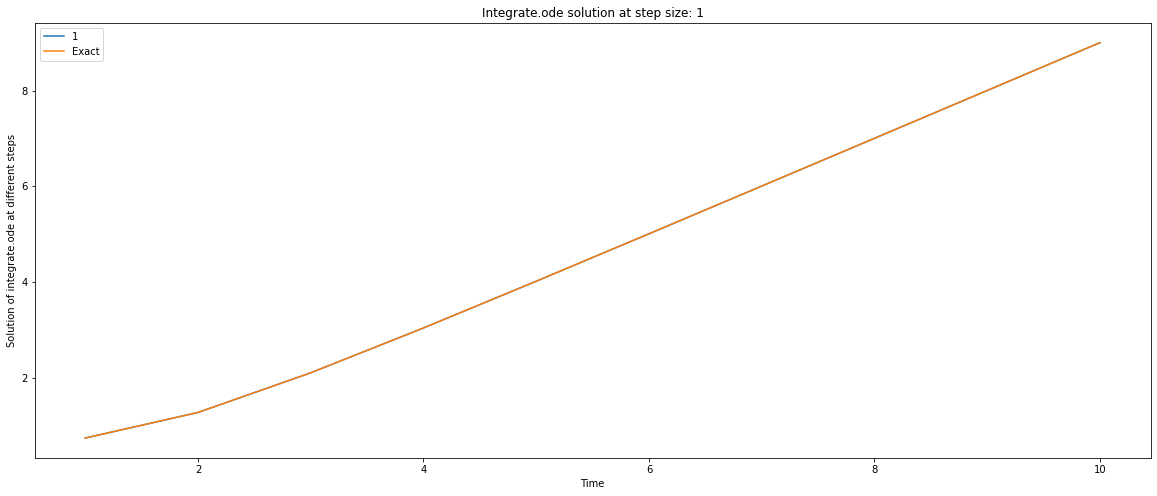

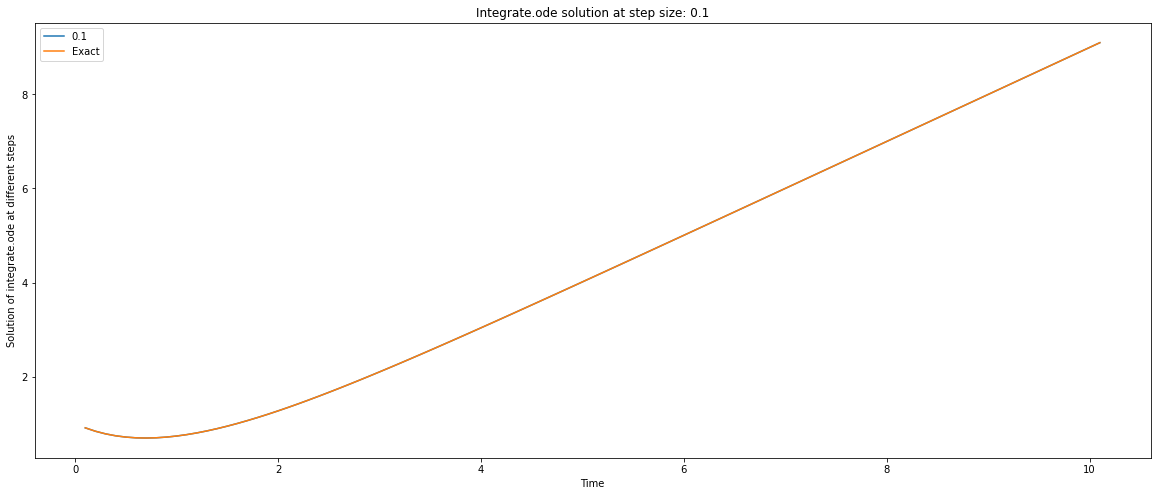

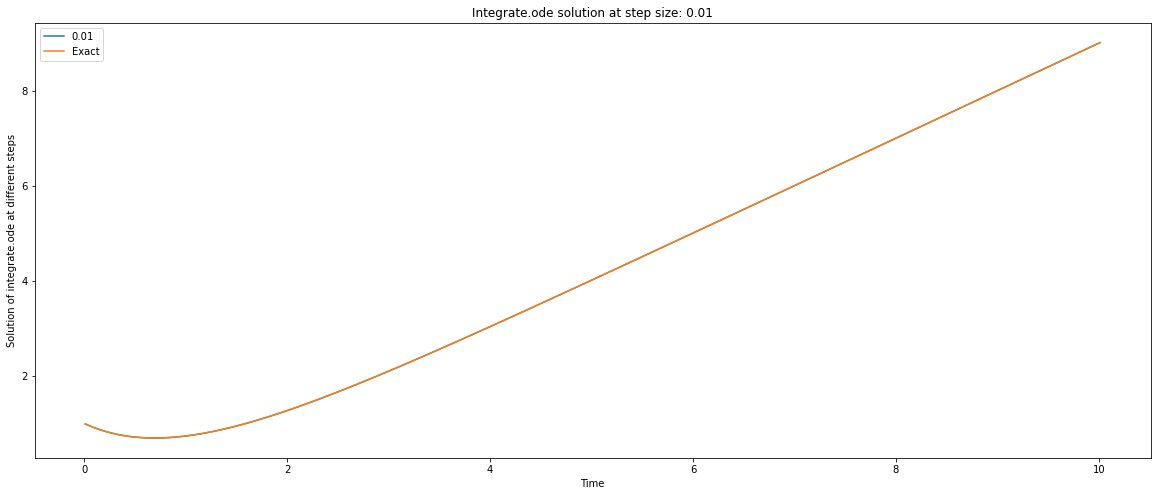

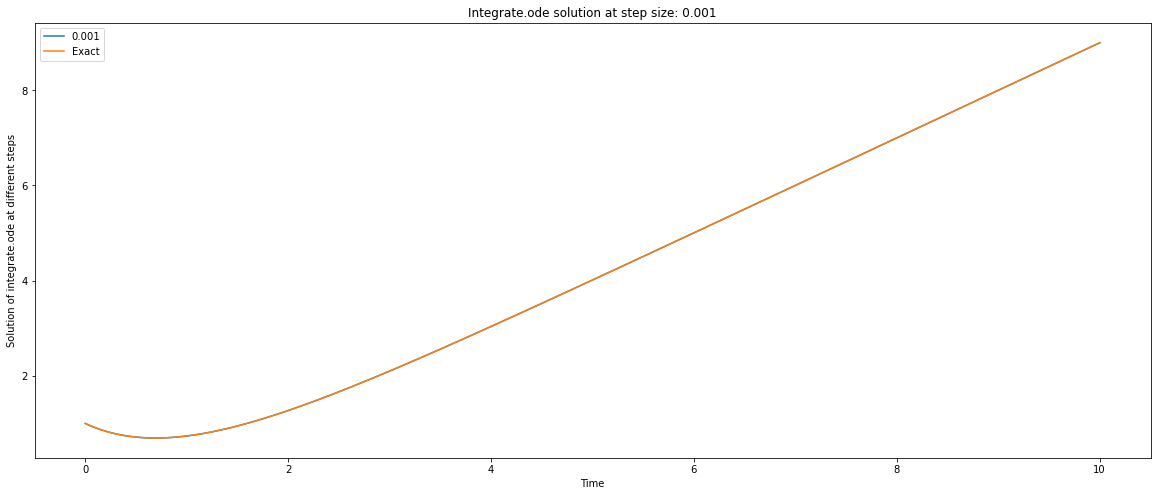

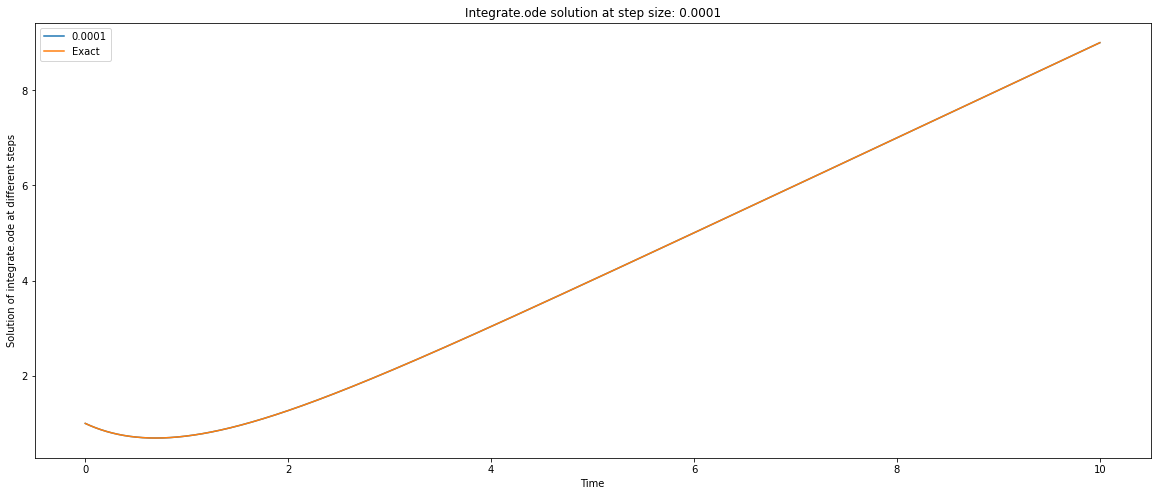

In [6]:
for i in range(len(dts)):
    p = plt.figure(i)
    p.set_figwidth(20)
    p.set_figheight(8)
    p = plt.subplot()
    p.plot(tss[i], yss[i]) 
    p.plot(tss[i], y_exacts[i]) 
    p.legend((str(dts[i]), "Exact"))
    p.set_xlabel('Time') 
    p.set_ylabel('Solution of integrate.ode at different steps') 
    p.set_title("Integrate.ode solution at step size: " + str(dts[i]))


Plot the error:

Text(0.5, 1.0, 'Error in Integrate.ode solution at different step sizes')

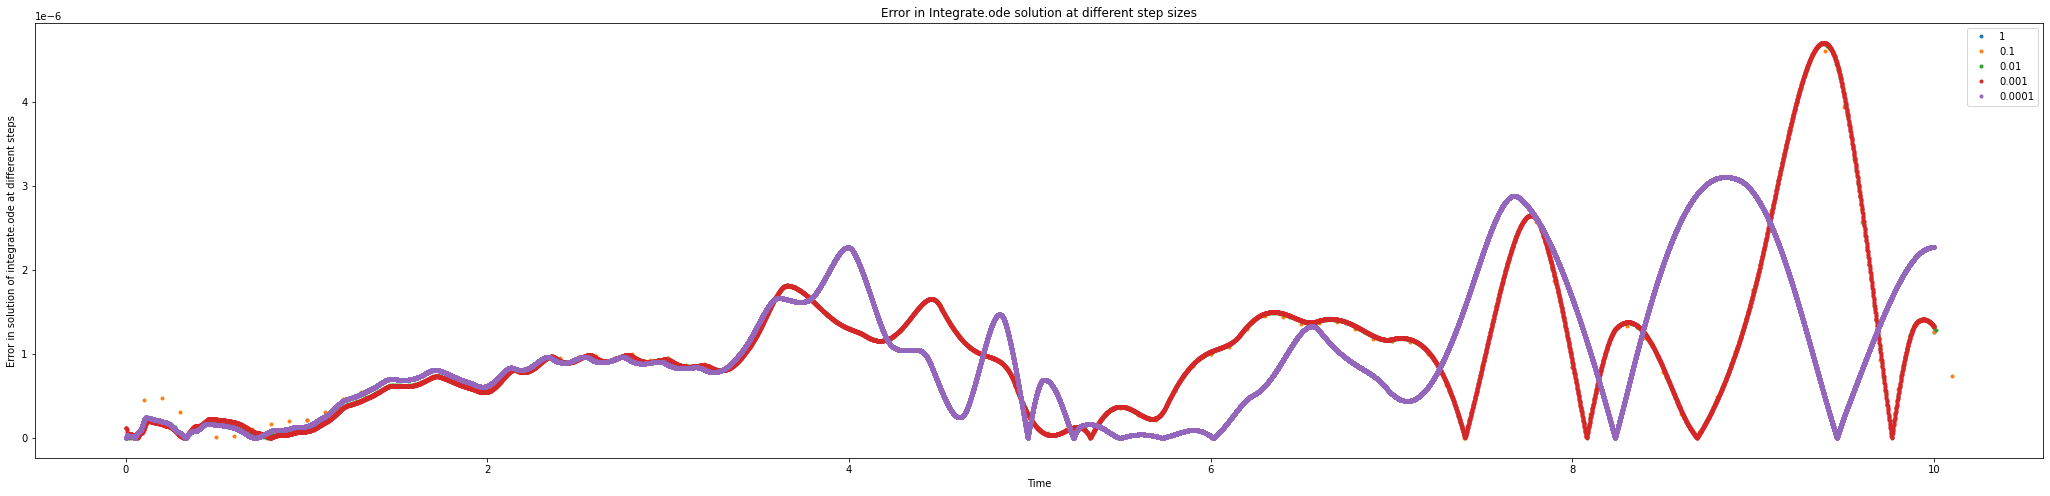

In [8]:
p = plt.figure(1)

p.set_figwidth(36)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(y_difference)):
    p.plot(tss[i], y_difference[i], ".") 
p.legend((dts))
p.set_xlabel('Time') 
p.set_ylabel('Error in solution of integrate.ode at different steps') 
p.set_title("Error in Integrate.ode solution at different step sizes")


To better understad the effect of the time step, I will plot the steps size against the area under the error curve. (numpy.trapz() function integrate along the given axis using the composite trapezoidal rule https://numpy.org/doc/stable/reference/generated/numpy.trapz.html )

Text(0.5, 1.0, 'Area under error curve against step size')

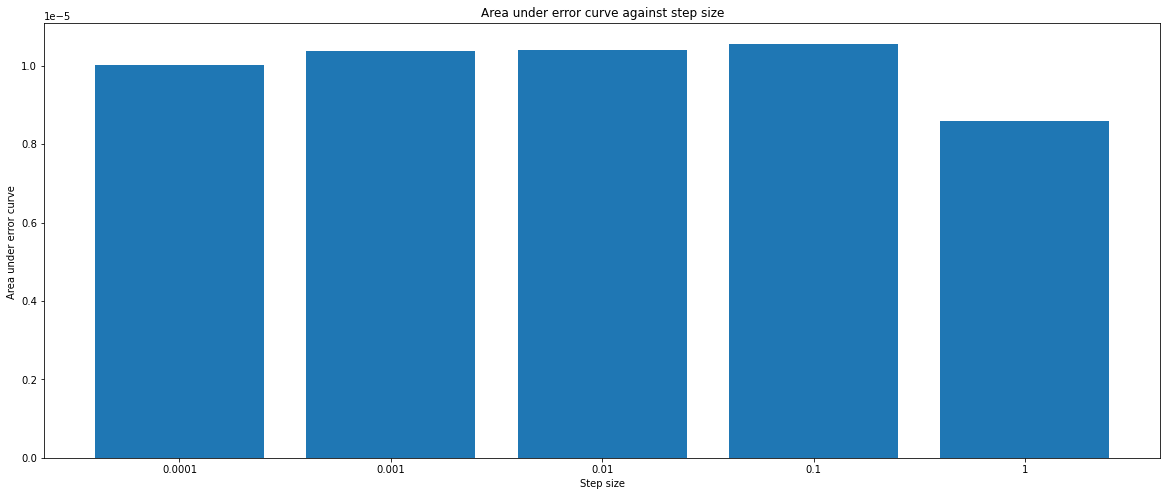

In [9]:
area_under_curve = []
for i in range(len(y_difference)):
    area_under_curve.append(np.trapz(y_difference[i], tss[i]))
p = plt.figure(1)


p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.bar(list(map(str, dts[::-1] )) , area_under_curve[::-1]) 
p.set_xlabel('Step size') 
p.set_ylabel('Area under error curve ') 
p.set_title("Area under error curve against step size")



# ATOL

Here, we set the step size to a constant value (0.1) and find the error for different values of atol.


In [10]:
# Define a function which calculates the derivative
def dy_dt(t, y):
    return t - y

# initial values
y0 = 1
t0 = 0

# set the integrater
r = ode(dy_dt).set_integrator('zvode' )
r.set_initial_value(y0, t0)

# time step 
max_time = 10
dt = 0.1

# generate 20 values of atol
atols = []
atol = 1e-10
atols.append(atol)
for i in range(19):
    atol = atol*np.sqrt(10)
    atols.append(atol)
    
# perform the integration 
yss_atols = []
tss_atols = []
for atol in atols:
    ys = []
    ts = []
    r = ode(dy_dt).set_integrator('zvode', atol = atol)
    r.set_initial_value(y0, t0)
    while r.successful() and r.t < max_time:
        ts.append(r.t + dt)
        ys.append((r.integrate(r.t + dt)[0]))
    yss_atols.append(ys)
    tss_atols.append(ts)

tss_atols =  np.array(tss_atols)
yss_atols = np.array(yss_atols)

# define the exact solution at every time step for different time steps
y_exacts = []
for atol in atols:
    y_exact = []
    for t in tss_atols[0]:
        y_exact.append(t - 1 + 2*np.exp(-t))
    y_exacts.append(y_exact)
y_exacts = np.array(y_exacts,  dtype=object)


# find error 
y_difference = np.abs(yss_atols - np.array(y_exacts))

print("done")

done


C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\l

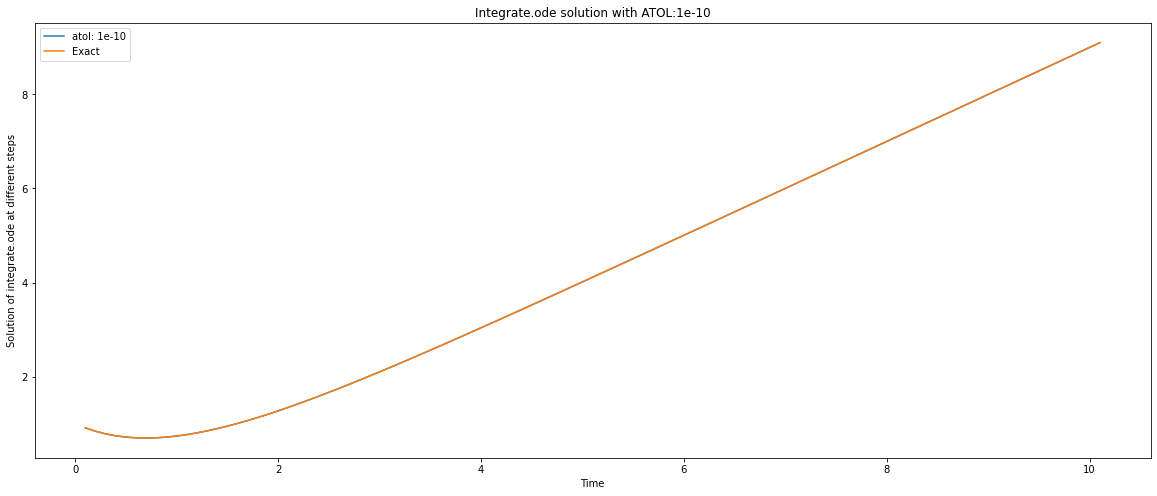

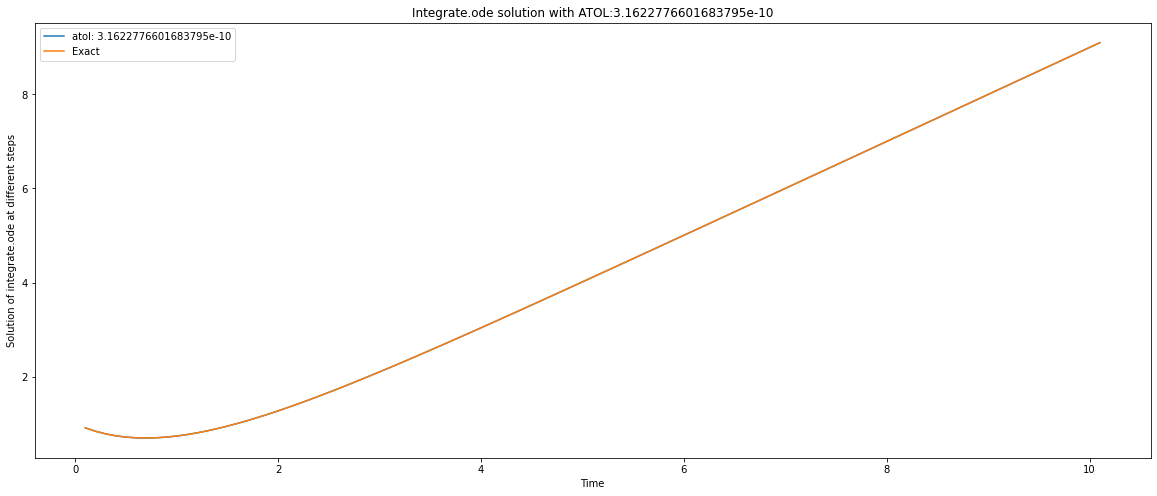

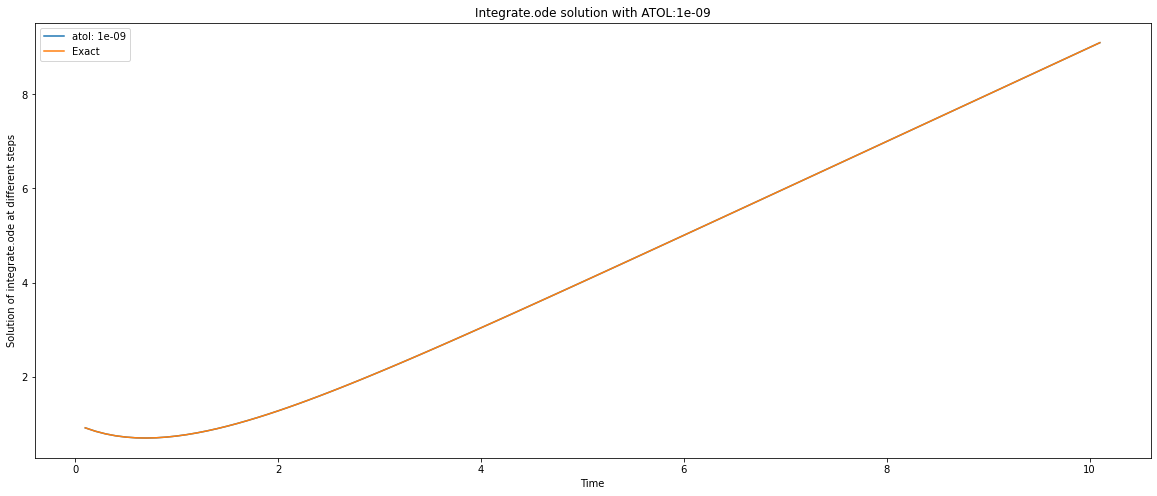

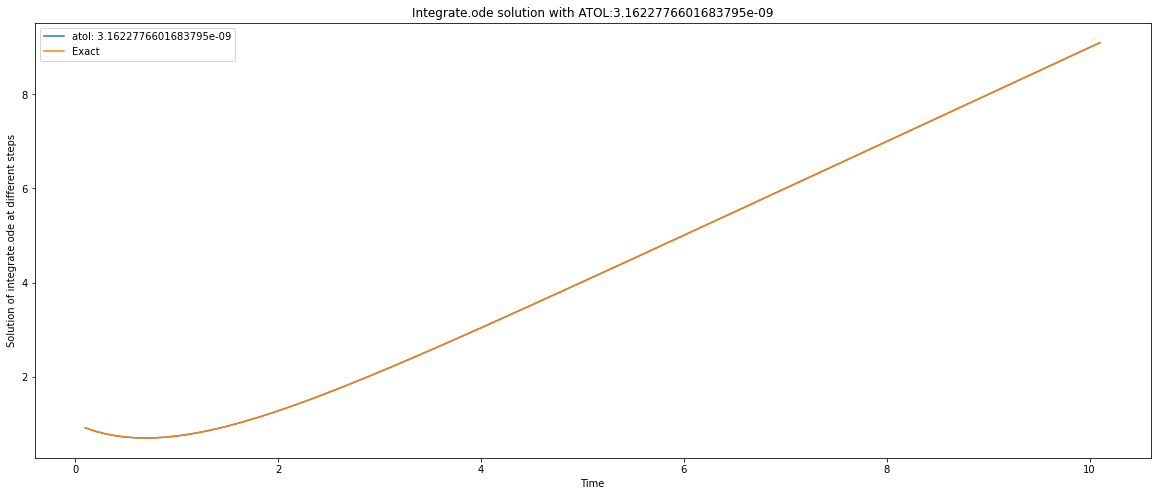

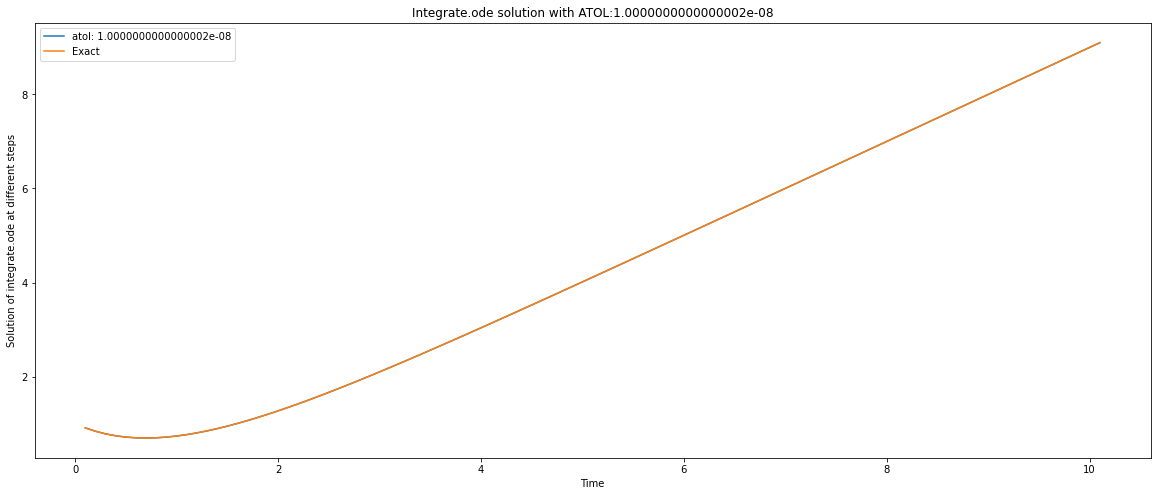

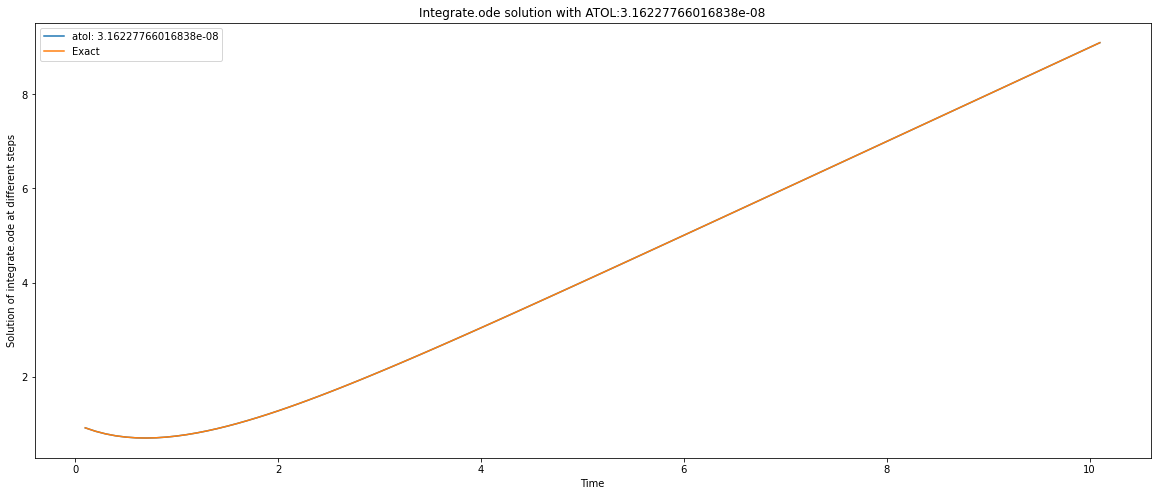

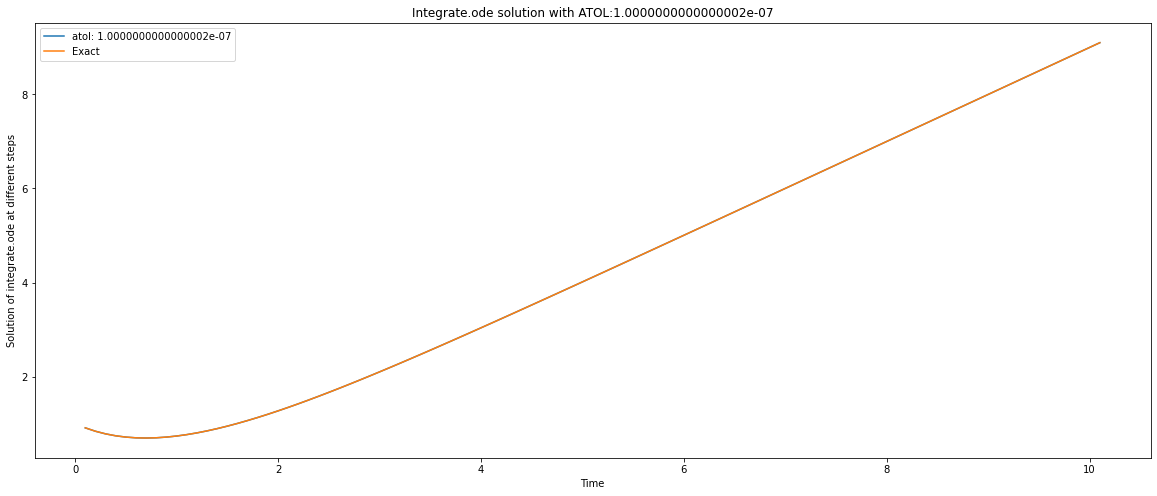

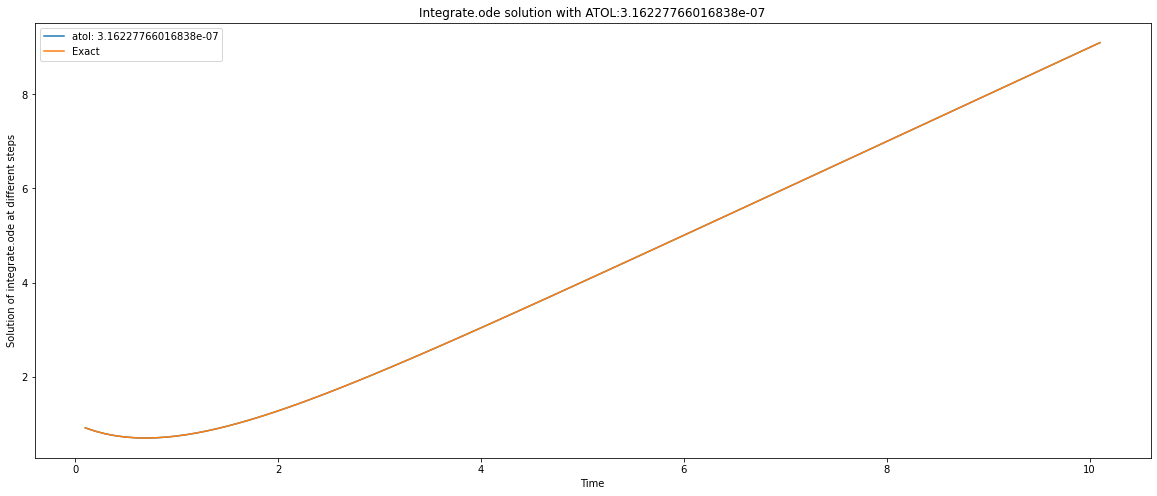

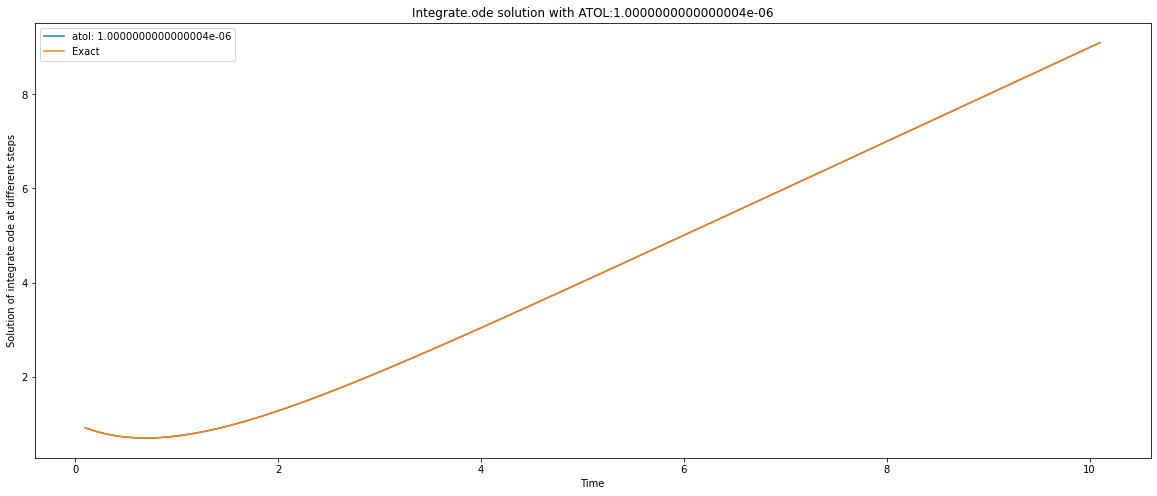

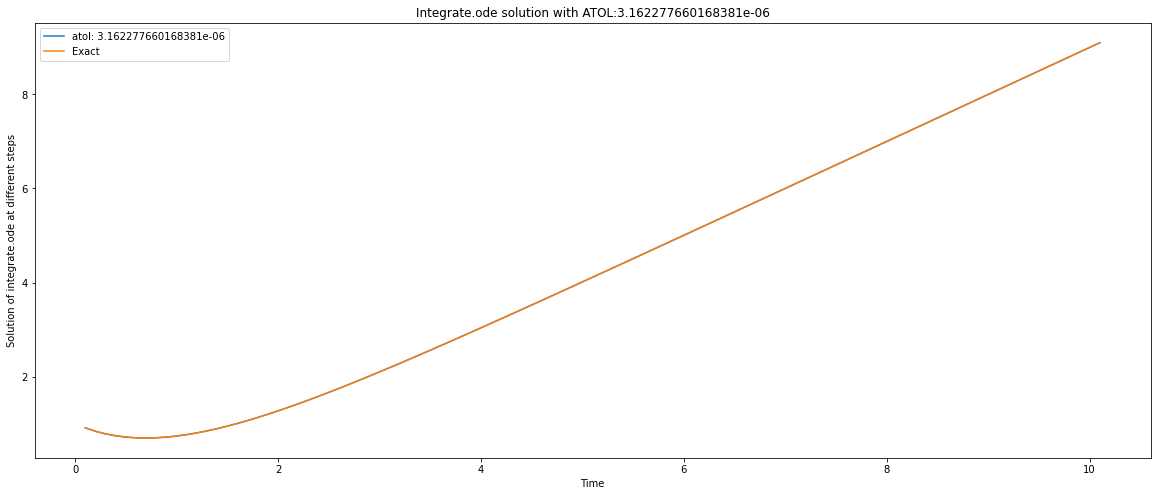

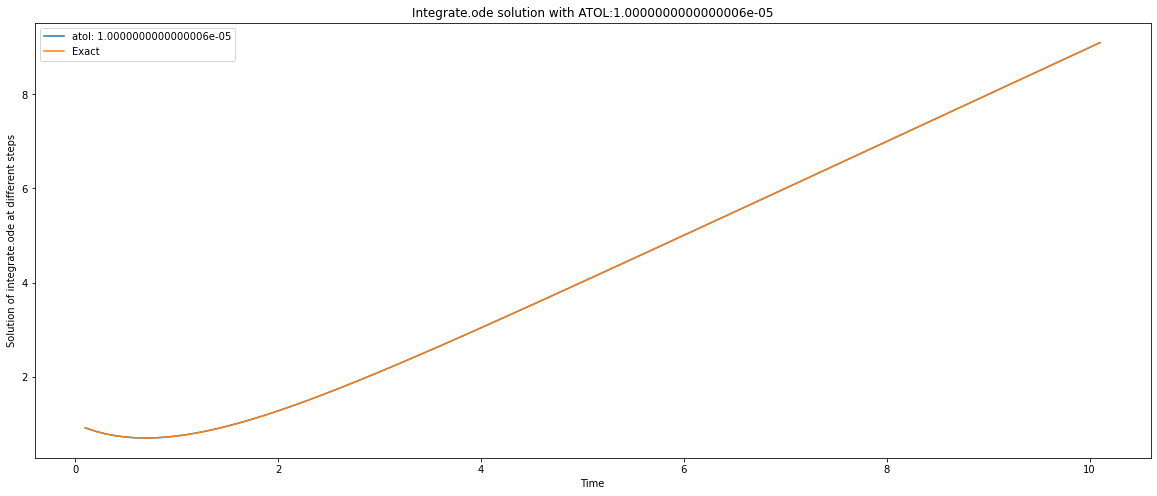

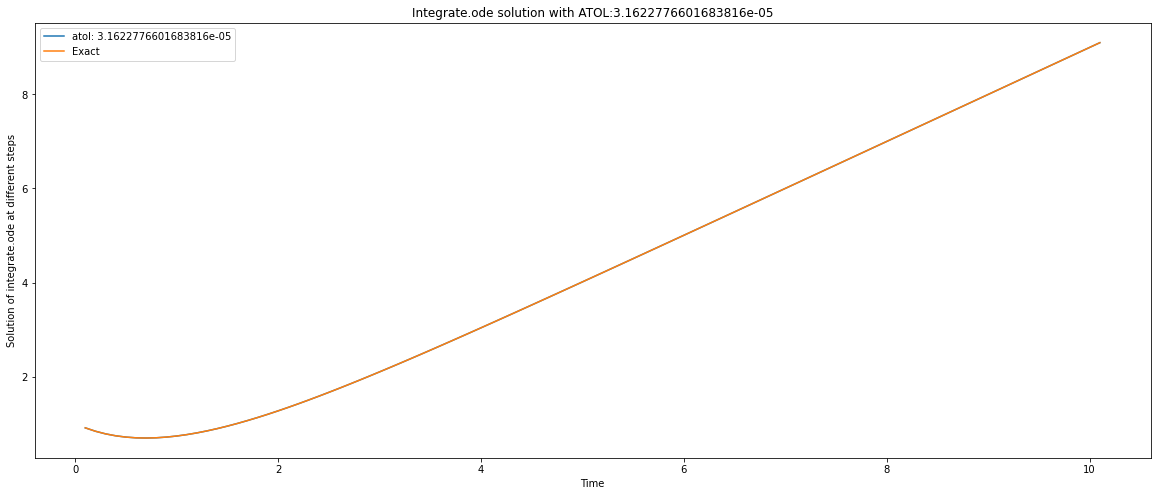

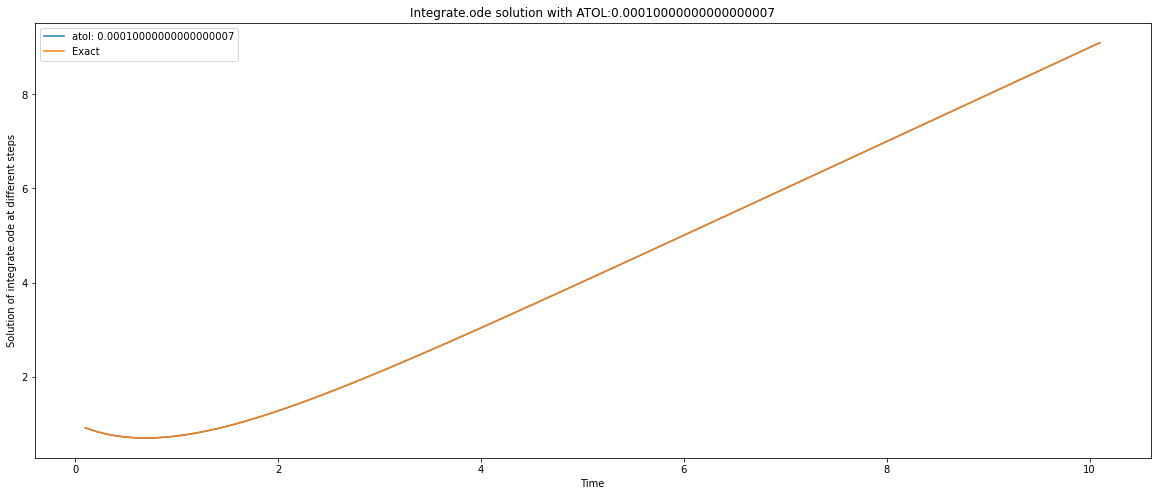

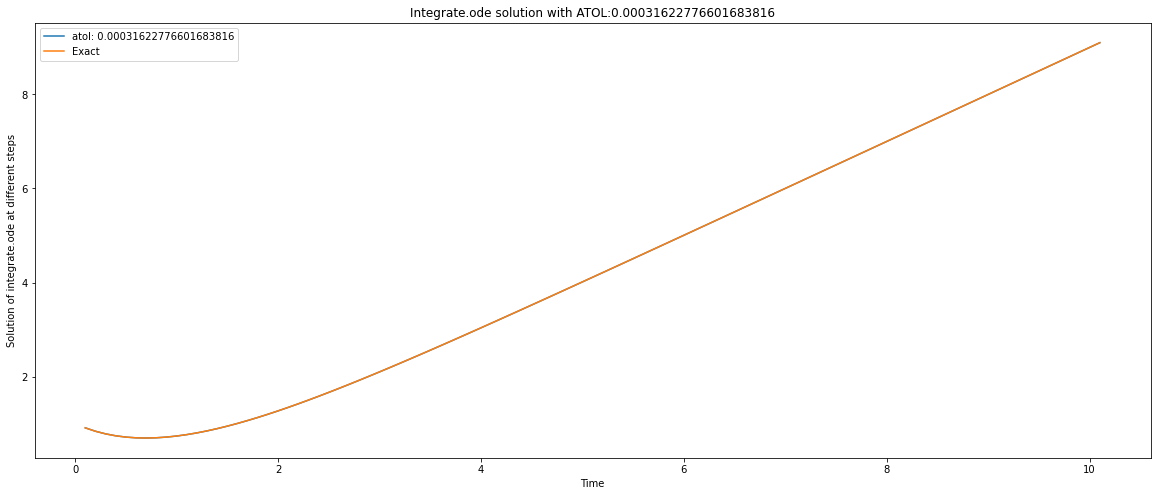

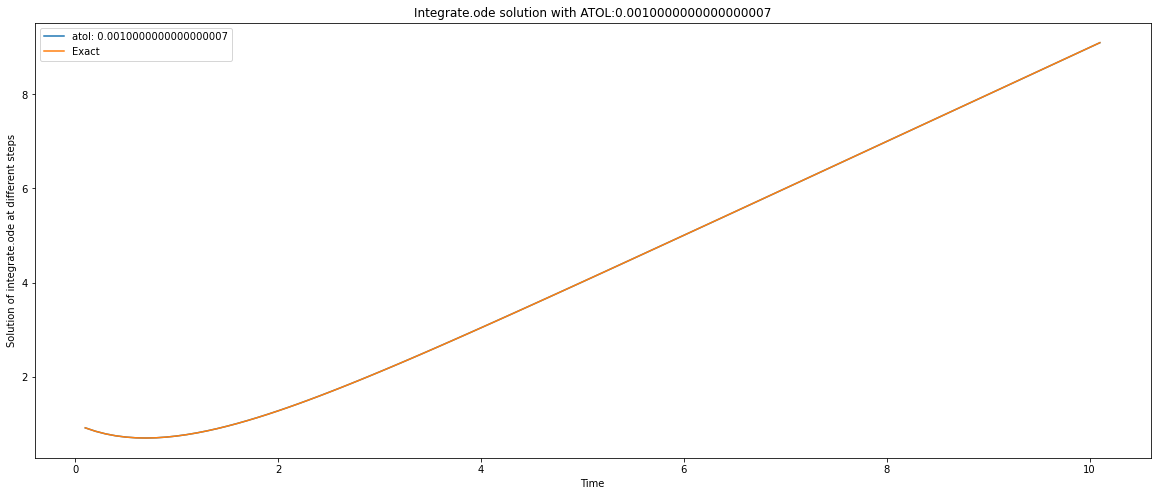

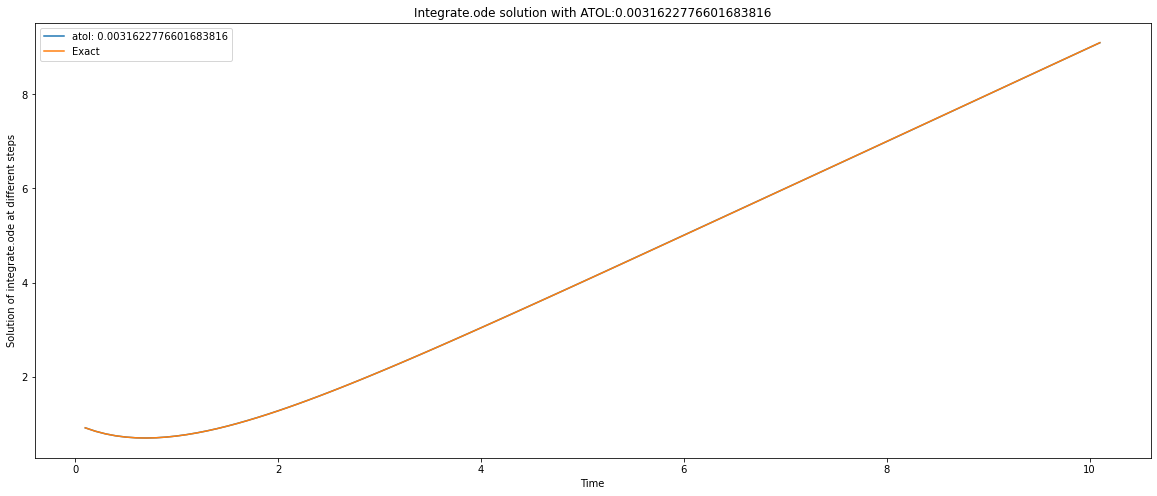

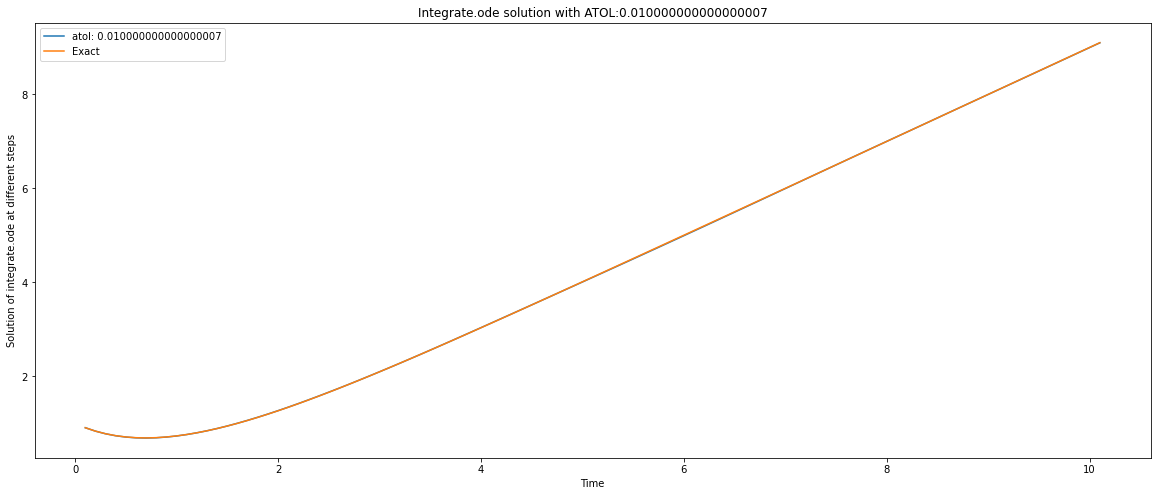

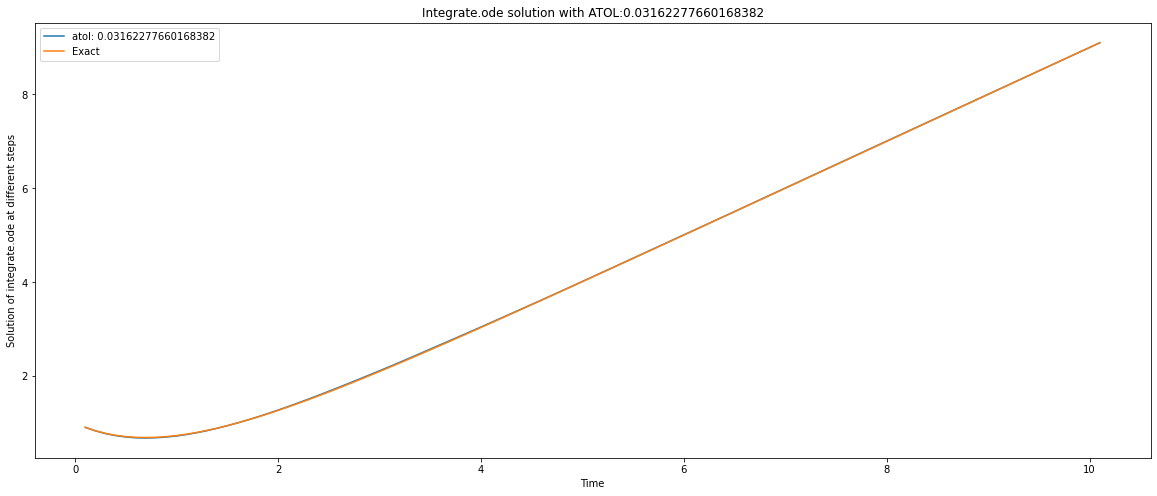

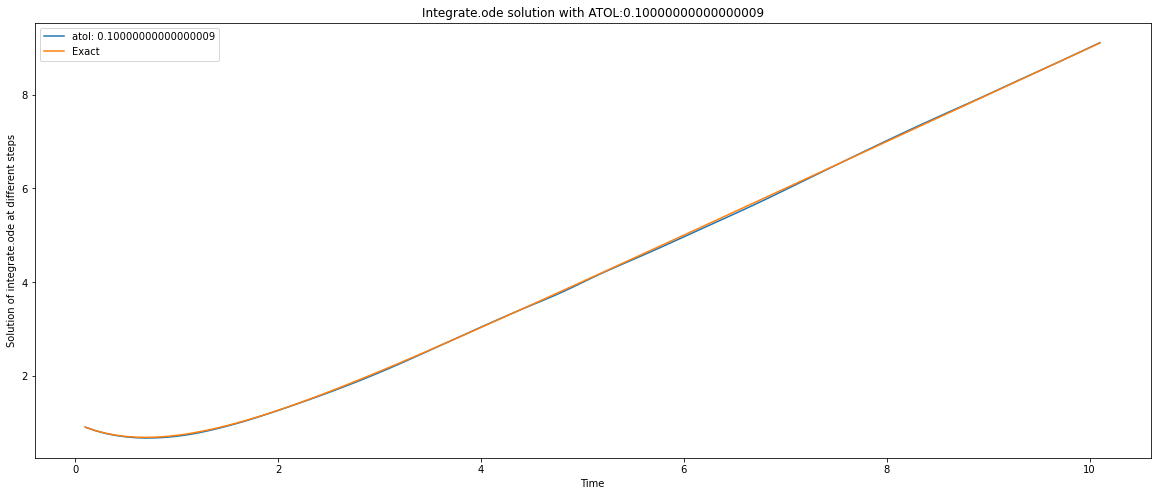

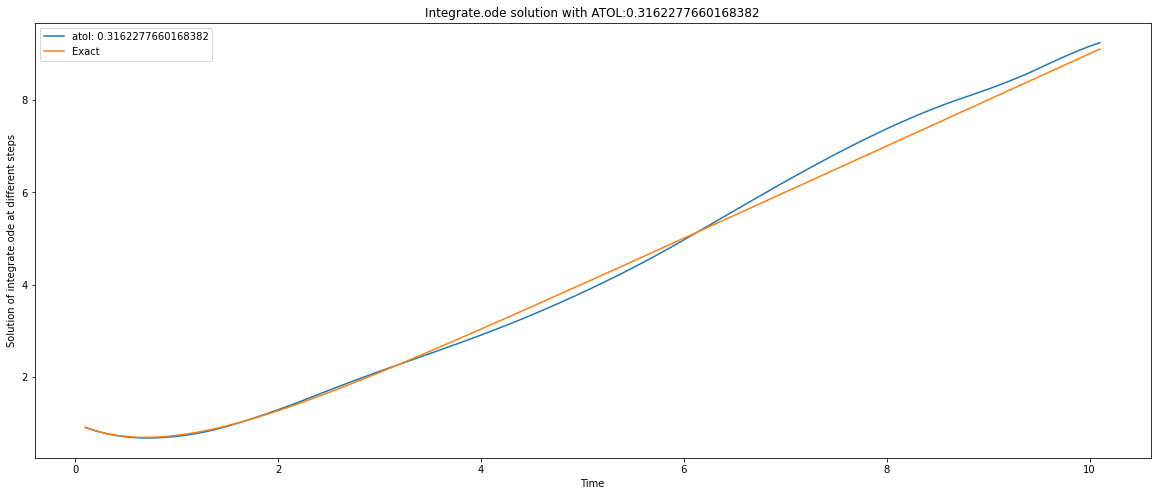

In [11]:
for i in range(len(atols)):
    p = plt.figure(i)
    p.set_figwidth(20)
    p.set_figheight(8)
    p = plt.subplot()
    p.plot(tss_atols[i], yss_atols[i]) 
    p.plot(tss_atols[i], y_exacts[i]) 
    p.legend(("atol: " + str(atols[i]), "Exact"))
    p.set_xlabel('Time') 
    p.set_ylabel('Solution of integrate.ode at different steps') 
    p.set_title("Integrate.ode solution with ATOL:" + str(atols[i]))


Text(0.5, 1.0, 'Error in Integrate.ode solution at step 0.01 and different atols')

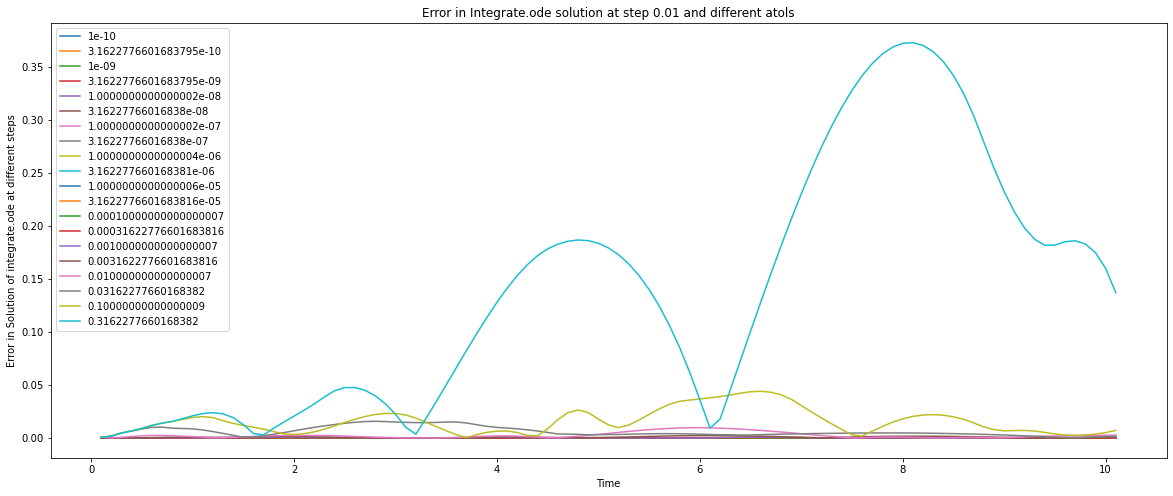

In [12]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(atols)):
    p.plot(tss_atols[i], y_difference[i]) 
p.legend((atols))

p.set_xlabel('Time') 
p.set_ylabel('Error in Solution of integrate.ode at different steps') 
p.set_title("Error in Integrate.ode solution at step 0.01 and different atols")


C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Area under error curve against step size')

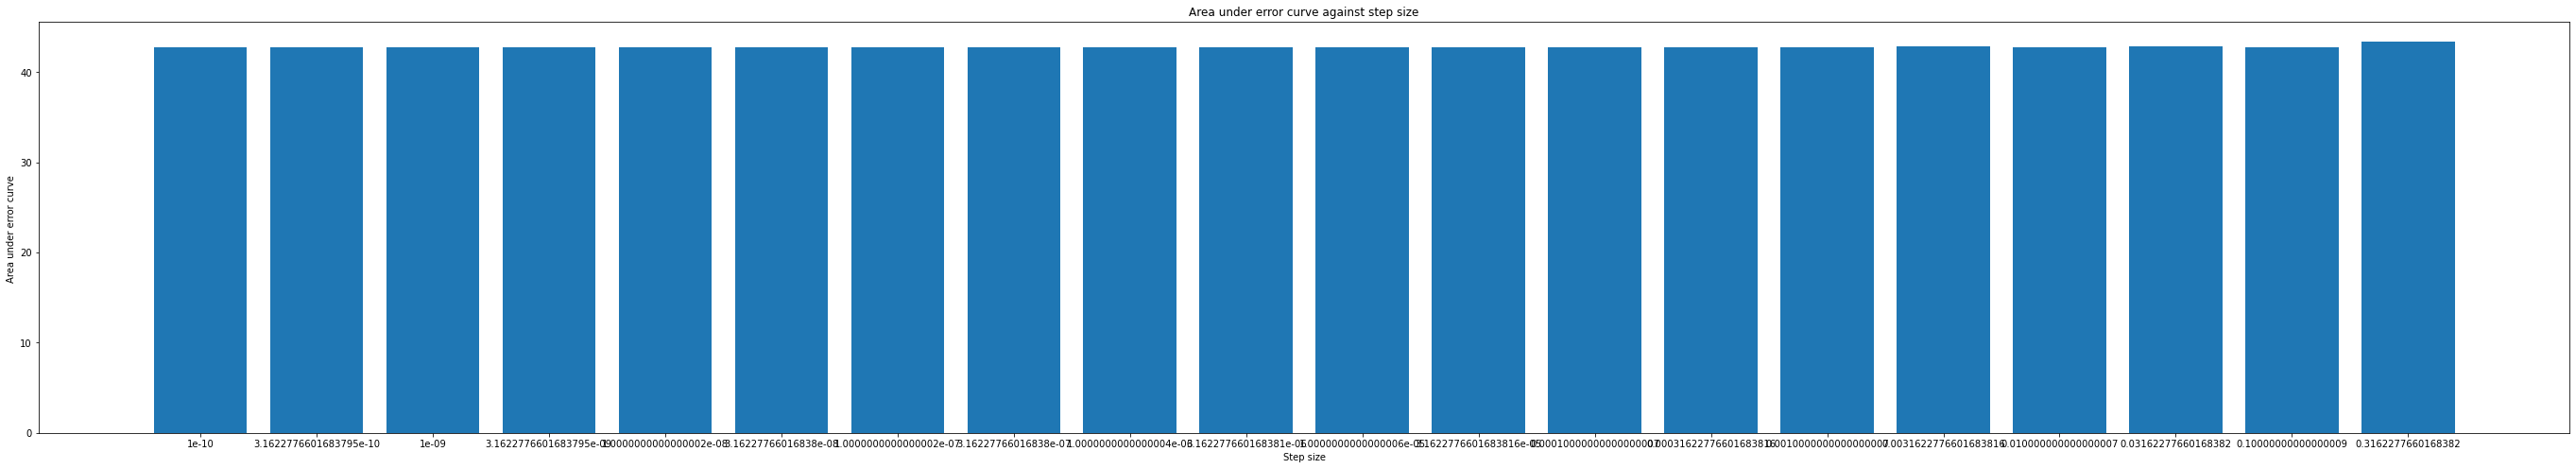

In [13]:
area_under_curve = []
for i in range(len(yss_atols)):
    area_under_curve.append(np.trapz(yss_atols[i], tss_atols[0]))
    
p = plt.figure(1)
p.set_figwidth(48)
p.set_figheight(8)
p = plt.subplot()
p.bar(list(map(str, atols )) , area_under_curve) 
p.set_xlabel('Step size') 
p.set_ylabel('Area under error curve ') 
p.set_title("Area under error curve against step size")


# RTOL

Here, we set the step size to a constant value (0.1) and find the error for different values of rtol.


In [14]:
# Define a function which calculates the derivative
def dy_dt(t, y):
    return t - y

# initial values
y0 = 1
t0 = 0

# set the integrater
r = ode(dy_dt).set_integrator('zvode' )
r.set_initial_value(y0, t0)

# time step 
max_time = 10
dt = 0.1


# generate 20 values of rtol
rtols = []
rtol = 1e-10
rtols.append(rtol)
for i in range(19):
    rtol = rtol*np.sqrt(10)
    rtols.append(rtol)

# perform the integration 
yss_rtols = []
tss_rtols = []
for rtol in rtols:
    ys = []
    ts = []
    r = ode(dy_dt).set_integrator('zvode', rtol = rtol)
    r.set_initial_value(y0, t0)
    while r.successful() and r.t < max_time:
        ts.append(r.t + dt)
        ys.append((r.integrate(r.t + dt)[0]))
    yss_rtols.append(ys)
    tss_rtols.append(ts)

tss_rtols =  np.array(tss_rtols)
yss_rtols = np.array(yss_rtols)

# define the exact solution at every time step for different time steps
y_exacts = []
for rtol in rtols:
    y_exact = []
    for t in tss_rtols[0]:
        y_exact.append(t - 1 + 2*np.exp(-t))
    y_exacts.append(y_exact)
y_exacts = np.array(y_exacts,  dtype=object)


# find error 
y_difference = np.abs(yss_rtols - np.array(y_exacts))

print("done")

done


C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Majd\anaconda3\l

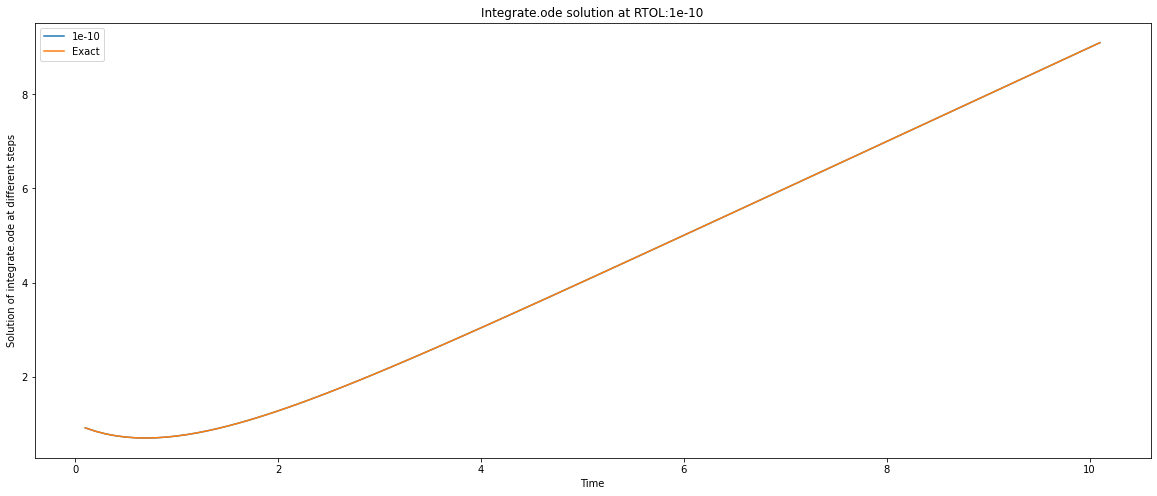

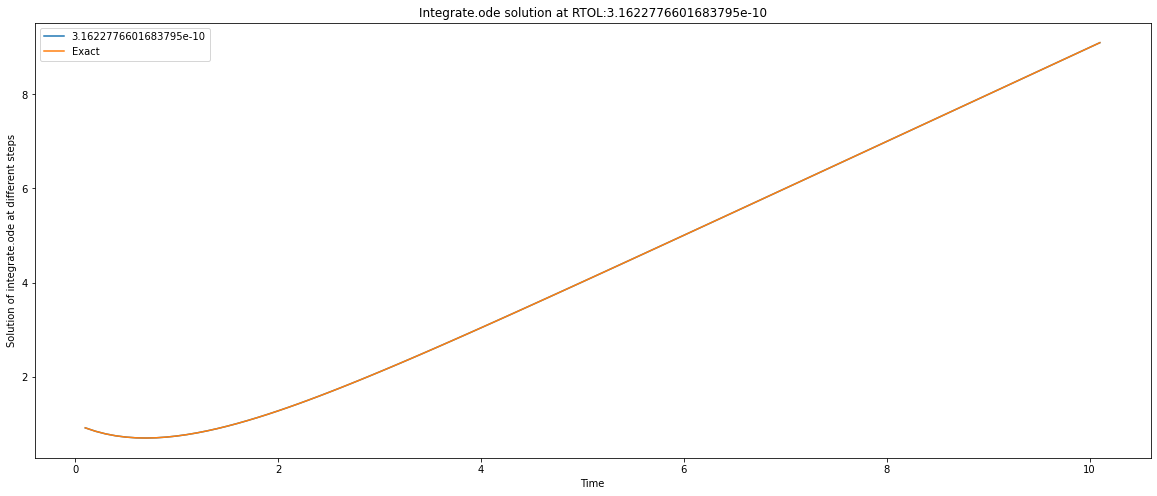

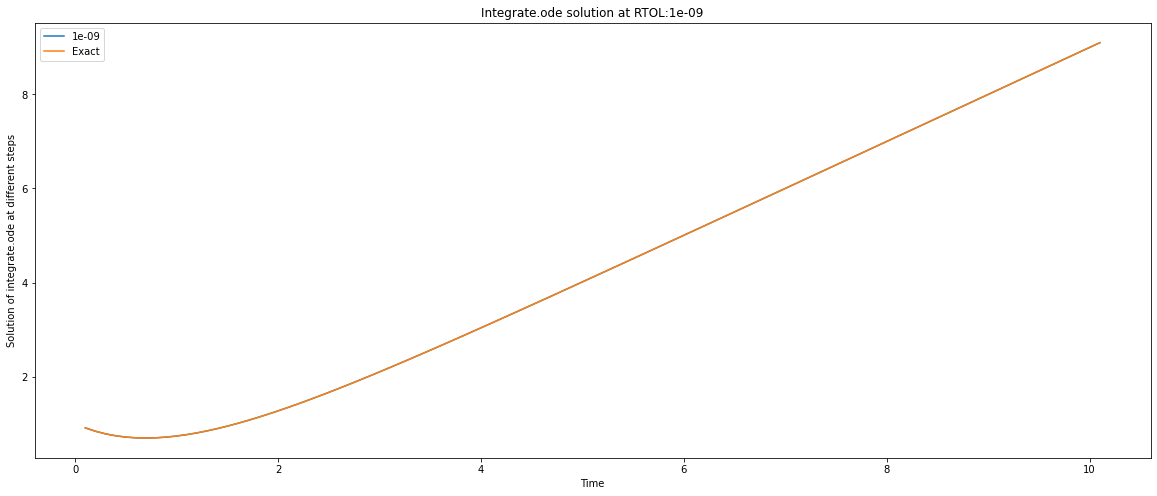

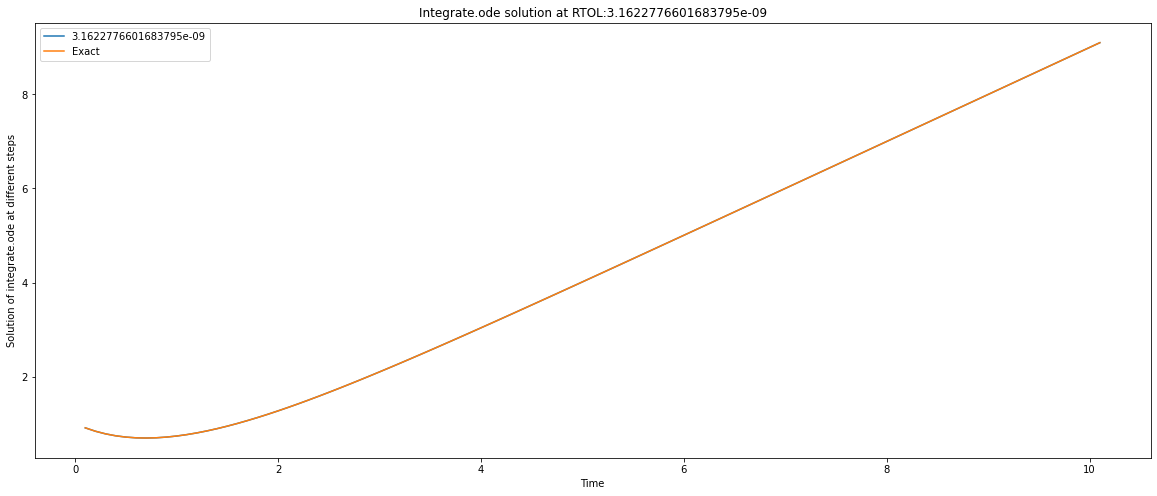

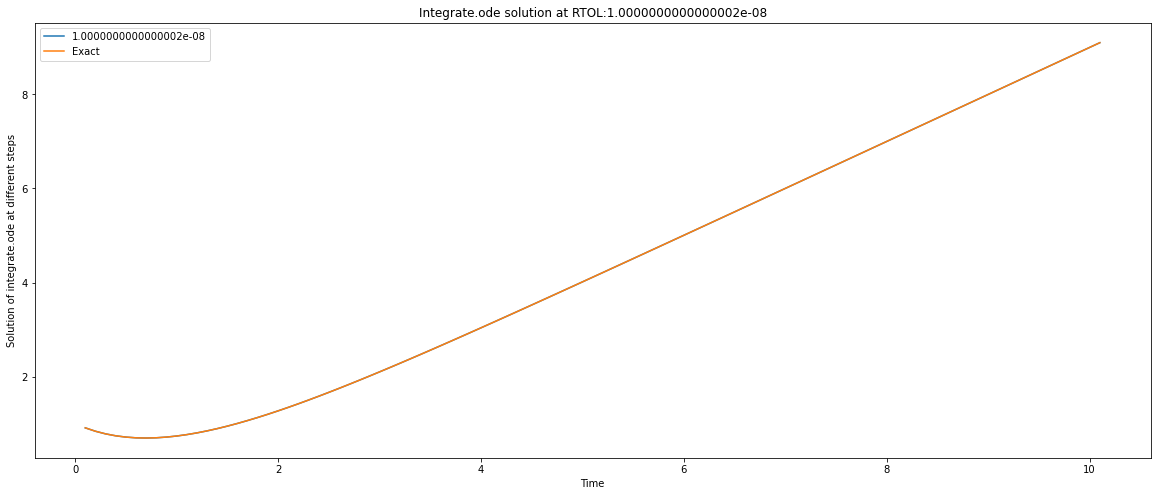

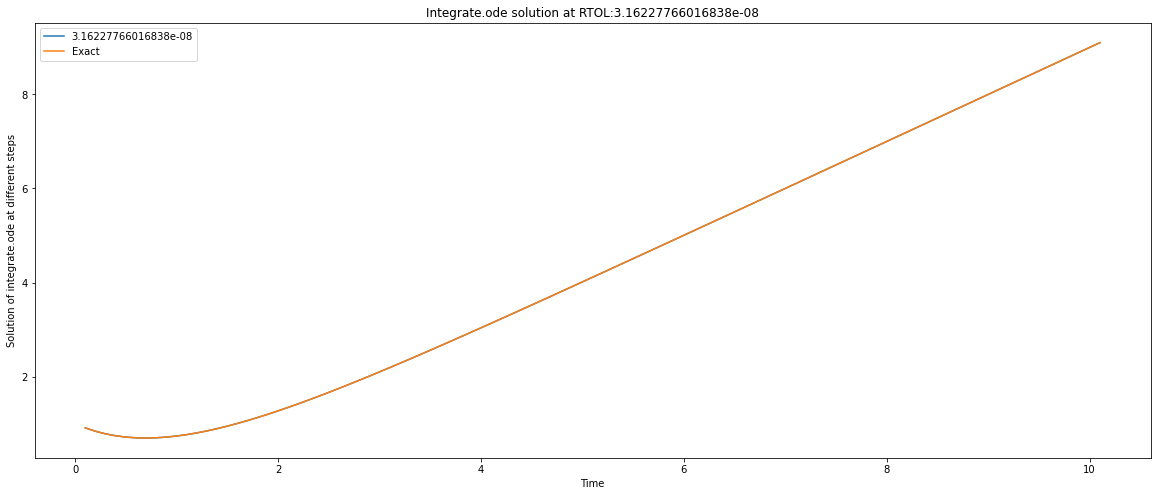

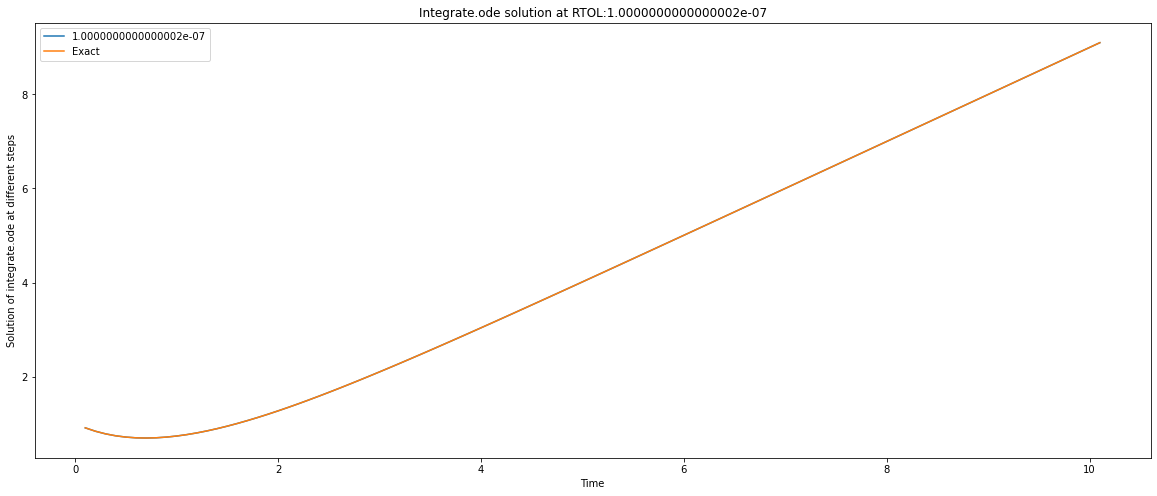

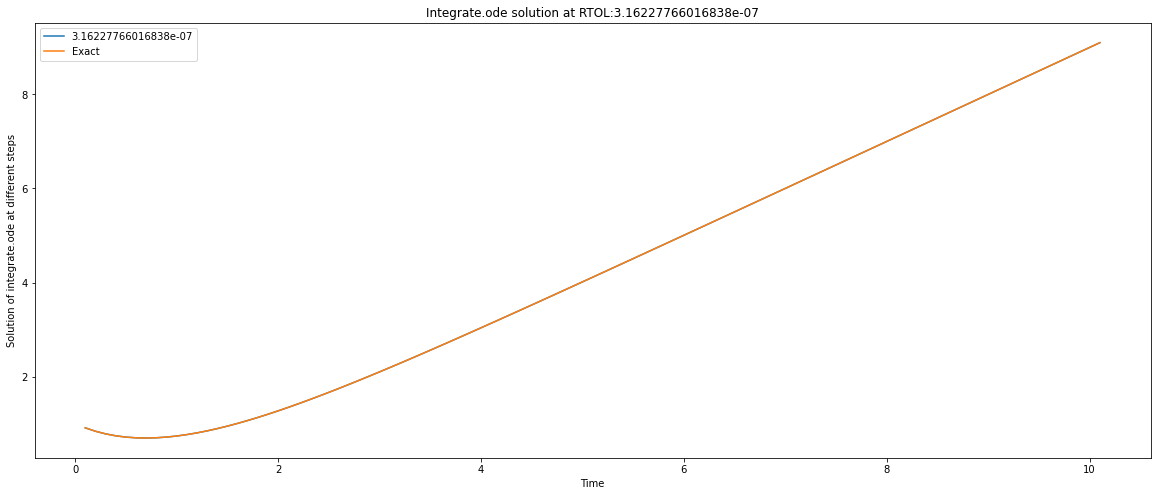

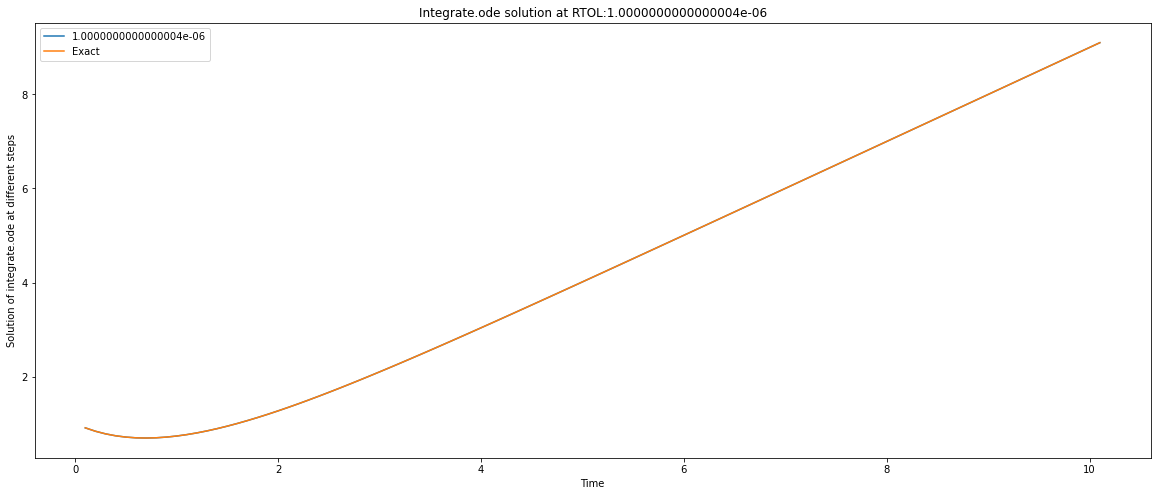

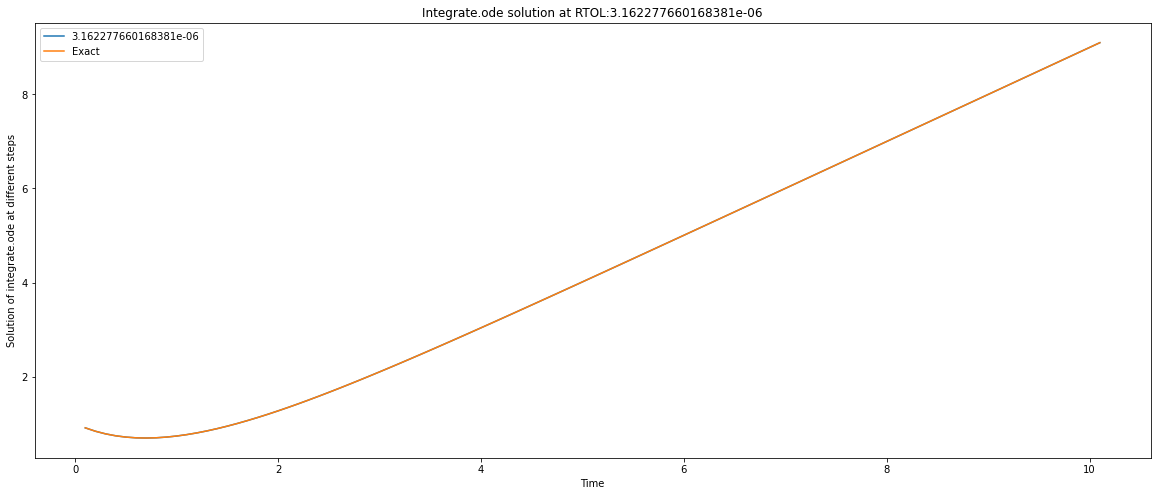

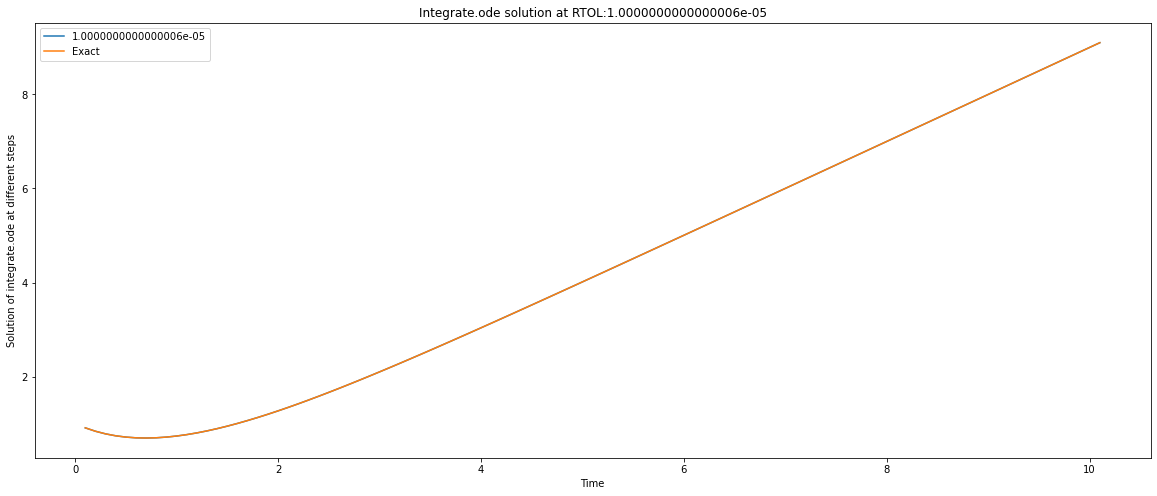

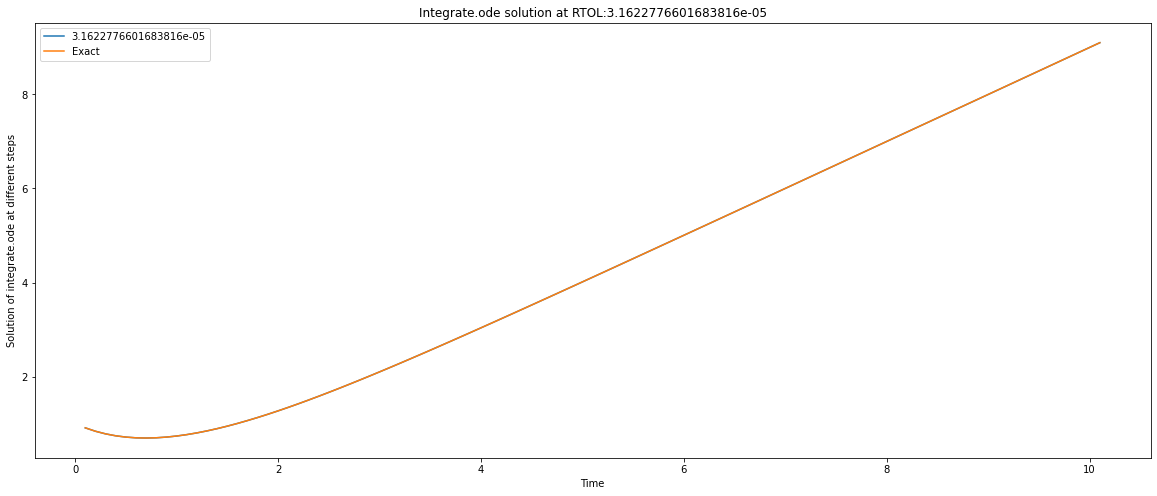

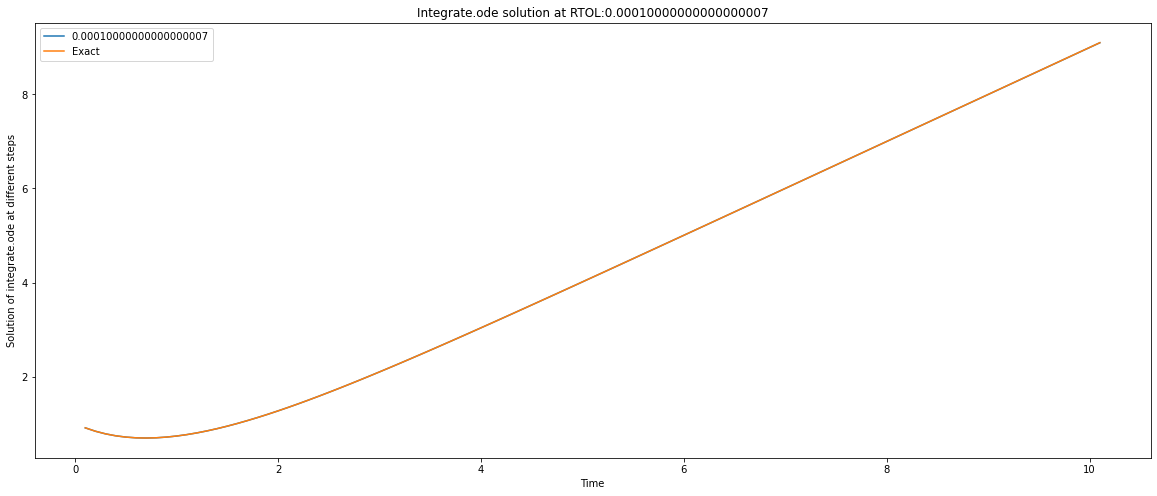

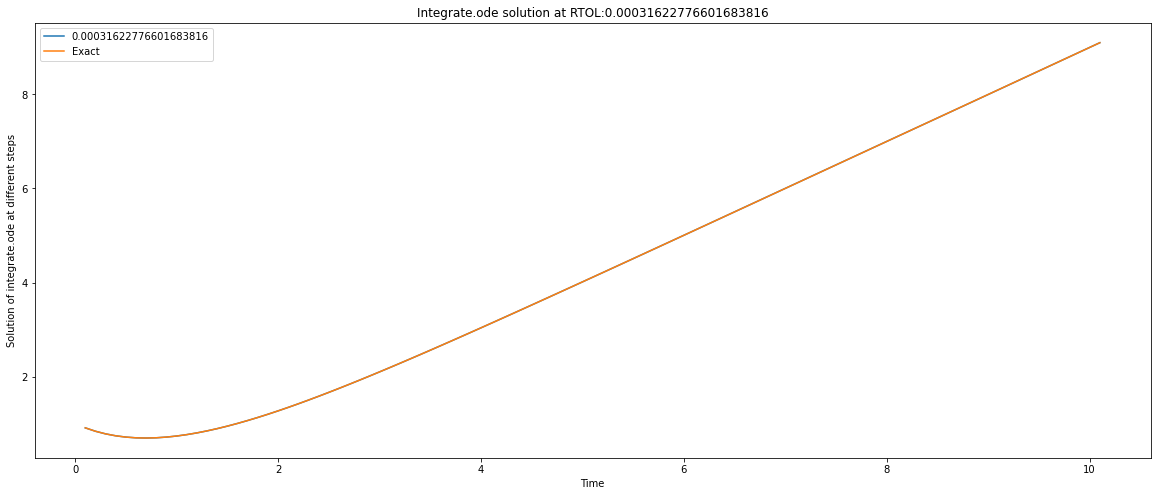

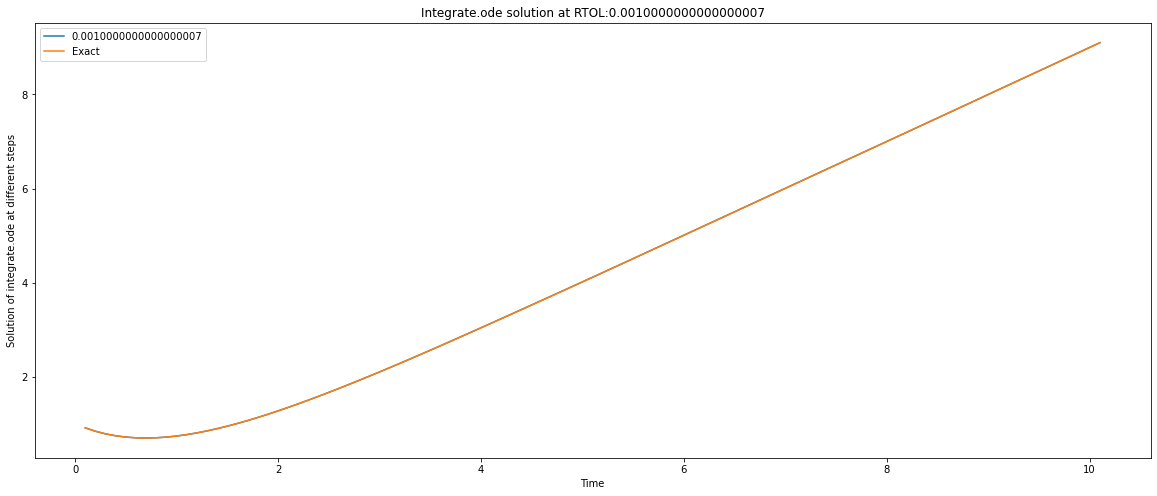

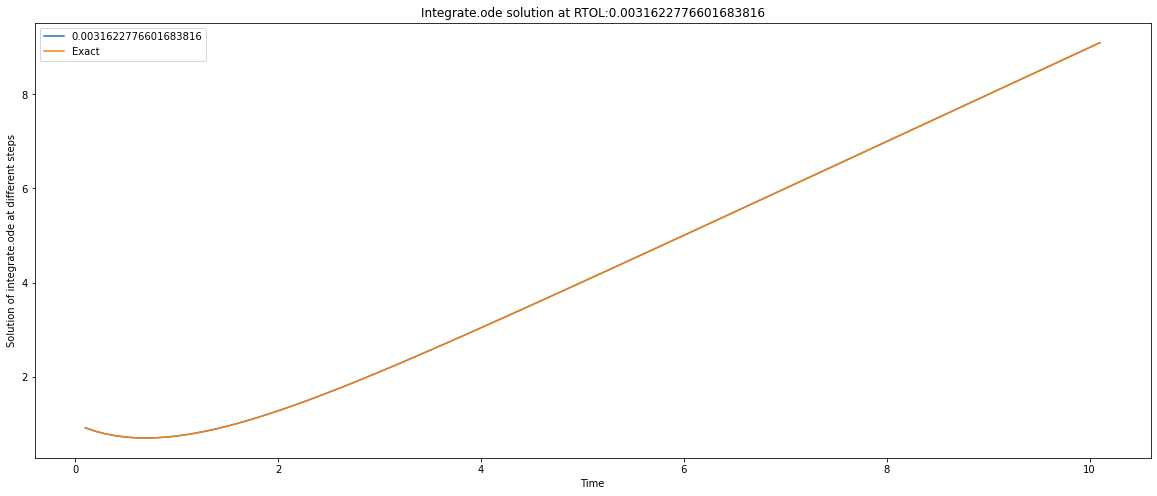

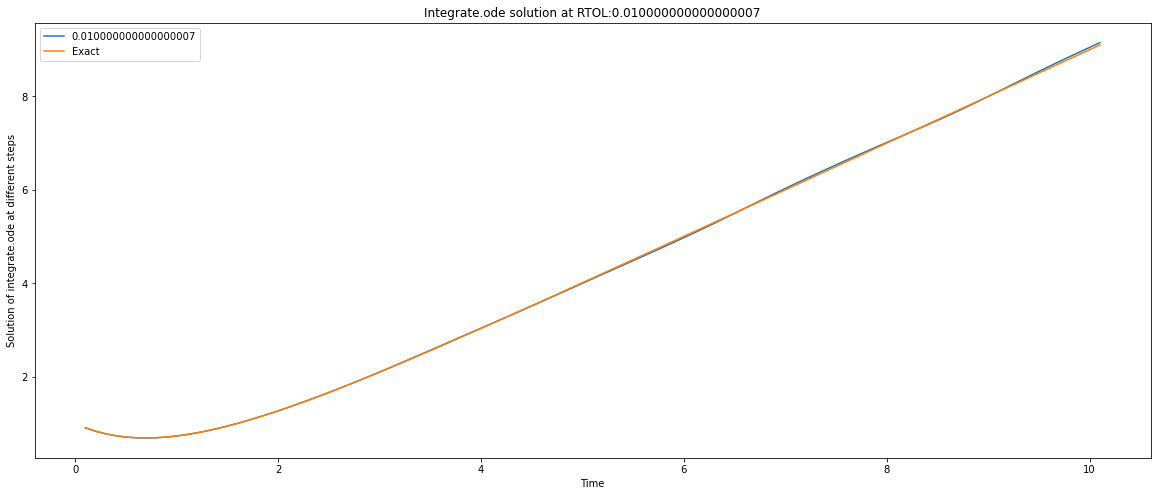

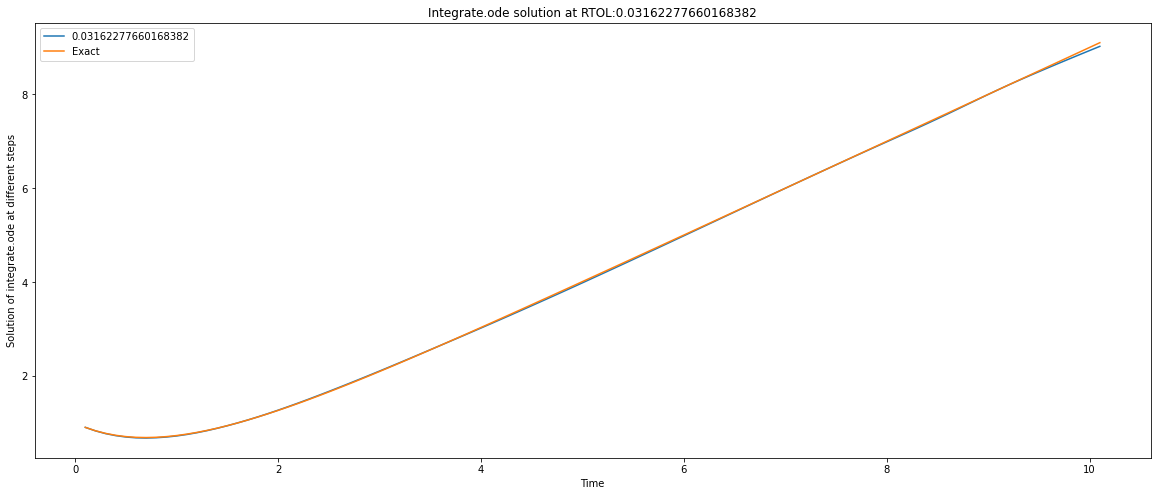

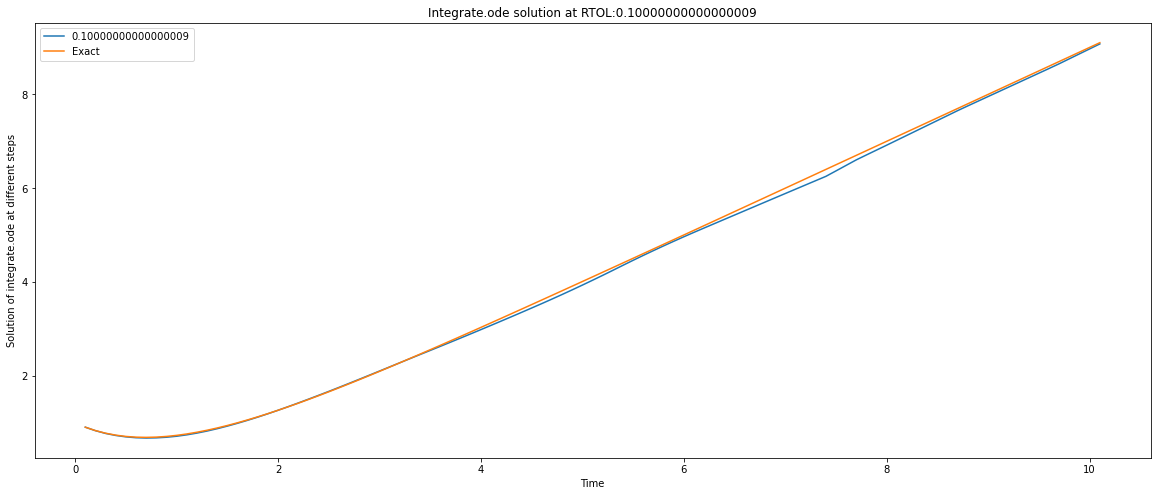

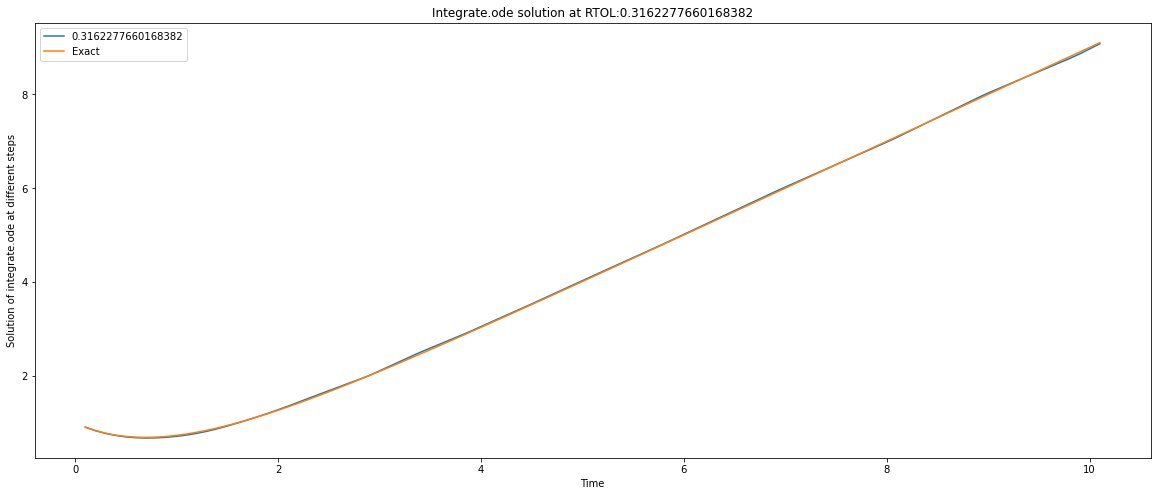

In [15]:
for i in range(len(rtols)):
    p = plt.figure(i)
    p.set_figwidth(20)
    p.set_figheight(8)
    p = plt.subplot()
    p.plot(tss_rtols[i], yss_rtols[i]) 
    p.plot(tss_rtols[i], y_exacts[i]) 
    p.legend((str(rtols[i]), "Exact"))
    p.set_xlabel('Time') 
    p.set_ylabel('Solution of integrate.ode at different steps') 
    p.set_title("Integrate.ode solution at RTOL:" + str(rtols[i]))


Text(0.5, 1.0, 'Error in Integrate.ode solution at step 0.1 and different atols')

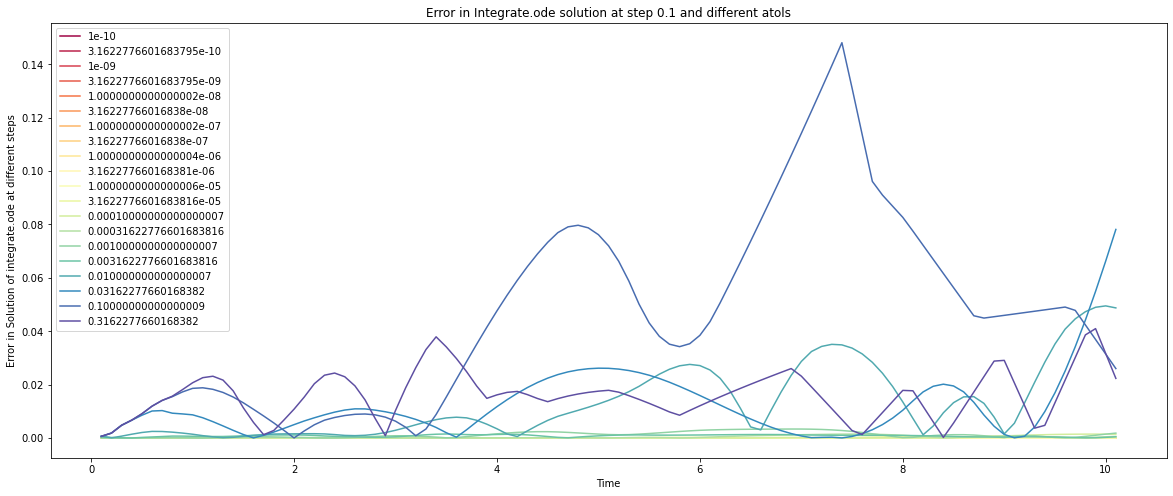

In [23]:
p = plt.figure(1)

p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,20)))
for i in range(len(rtols)):
    p.plot(tss_rtols[i], y_difference[i]) 
p.legend((rtols))

p.set_xlabel('Time') 
p.set_ylabel('Error in Solution of integrate.ode at different steps') 
p.set_title("Error in Integrate.ode solution at step 0.1 and different atols")


C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Area under error curve against step size')

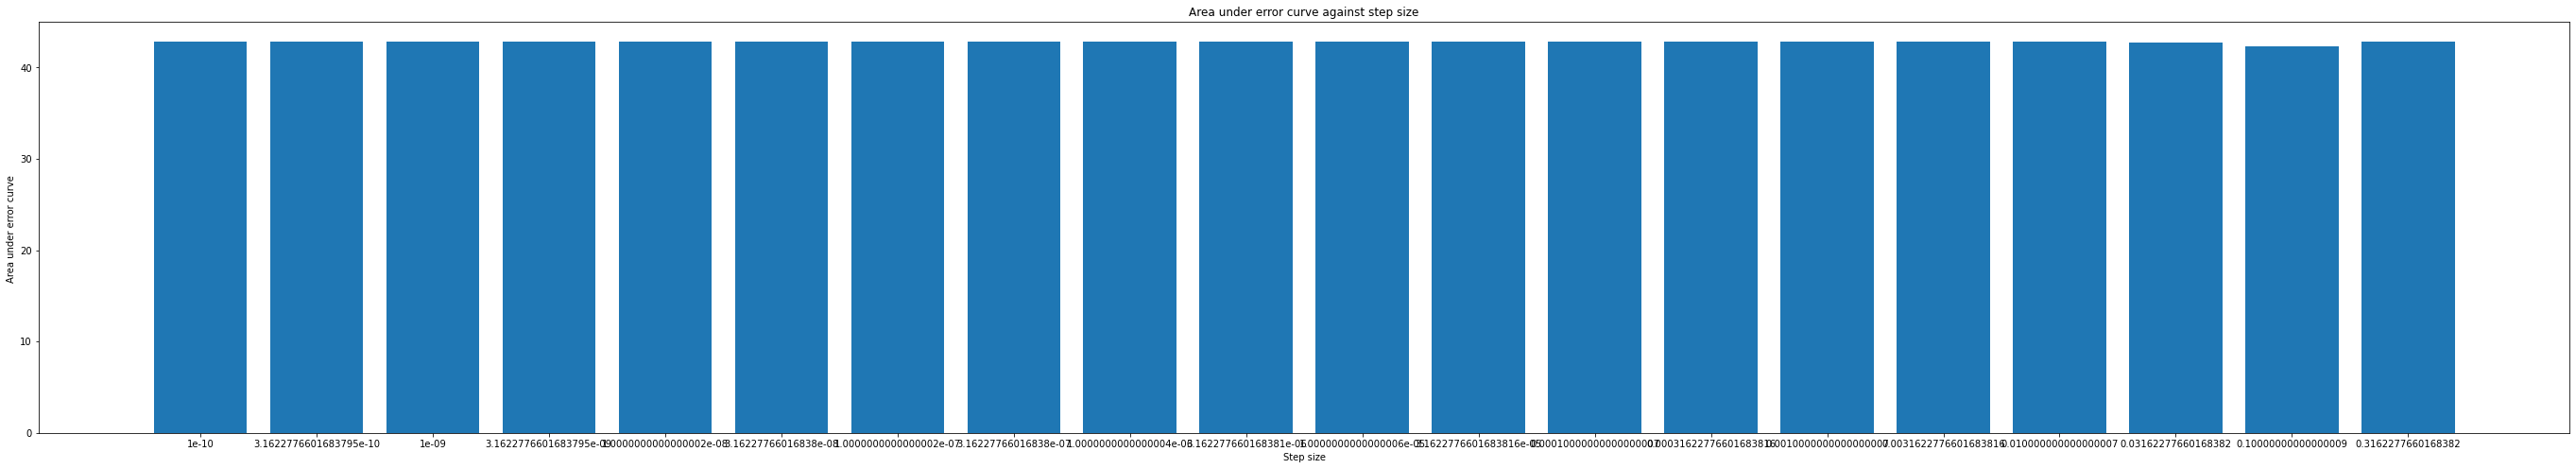

In [24]:

area_under_curve = []
for i in range(len(yss_atols)):
    area_under_curve.append(np.trapz(yss_rtols[i], tss_rtols[i]))
p = plt.figure(1)
p.set_figwidth(48)
p.set_figheight(8)
p = plt.subplot()
p.bar(list(map(str, rtols )) , area_under_curve) 
p.set_xlabel('Step size') 
p.set_ylabel('Area under error curve ') 
p.set_title("Area under error curve against step size")


# Second Order ODE
It is hard to charecterise the error relationship when working with simple First Order ODE. Here, we investigate the error on a second order differential equation. The equation we study is:

\begin{equation}\frac{d^2y}{dt^2} - 9y = 0, y(0) = 1, y'(0) = 3 \end{equation}

The solution for this equation is: \begin{equation}e^{3t} \end{equation}


In [61]:
# Define a function which calculates the derivative
def f(t, u):
    return [u[1], 9*u[0]]

# initial values
y0 = [1, 3]
t0 = 0


# time step 
max_time = 10
dts = []
dt = 1
dts.append(dt)

# generate 5 different sets of dt
for _ in range(4):
    dt = dt/10
    dts.append(dt)
    
    

# perform the integration 
yss = []
tss = []
for i in range(len(dts)):
    r = ode(f).set_integrator('zvode')
    r.set_initial_value(y0, t0)
    ys = []
    ts = []
    while r.successful() and r.t < max_time:
        ts.append(r.t + dts[i])
        ys.append(np.abs(r.integrate(r.t + dt)[0]))
    yss.append(np.array(ys))
    tss.append(np.array(ts))


tss =  np.array(tss, dtype=object)
yss = np.array(yss, dtype=object)


# define the exact solution at every time step for different time steps
y_exacts = []
for ts in tss:
    y_exact = []
    for t in ts:
        y_exact.append(np.exp(3*t))
    y_exacts.append(np.array(y_exact))
y_exacts = np.array(y_exacts,  dtype=object)

# find error 
y_difference = np.abs(yss - np.array(y_exacts))

print("done")

done


Plot Results:

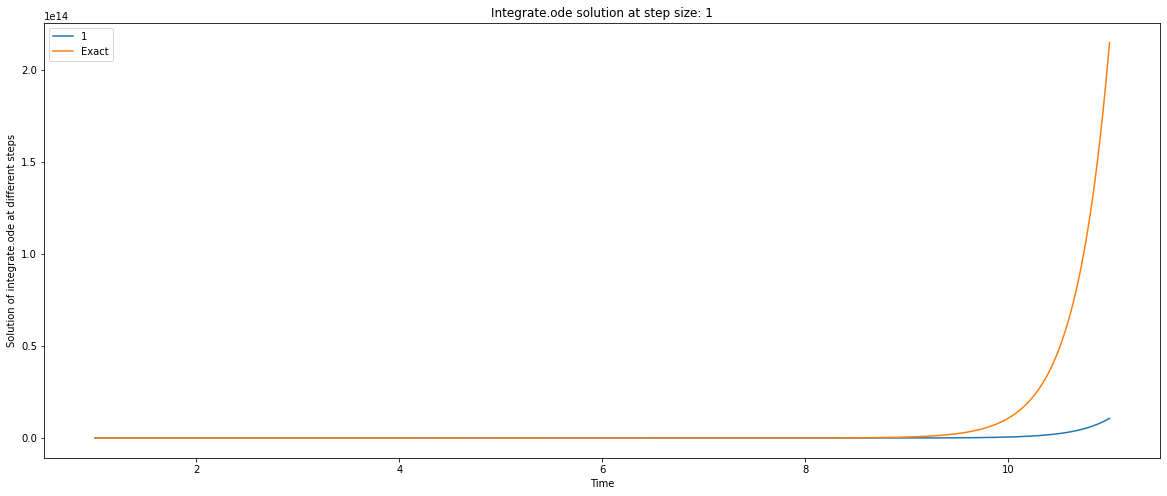

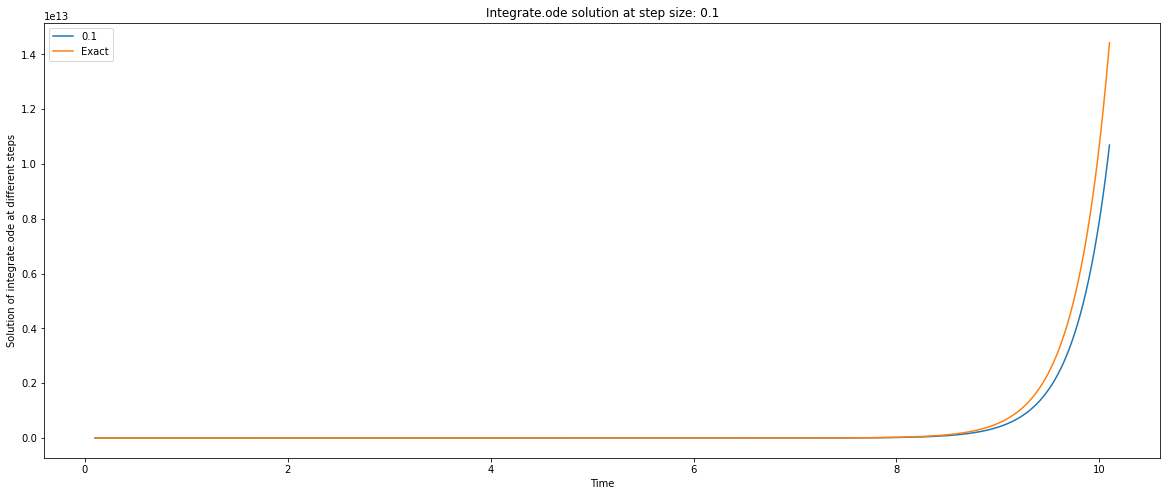

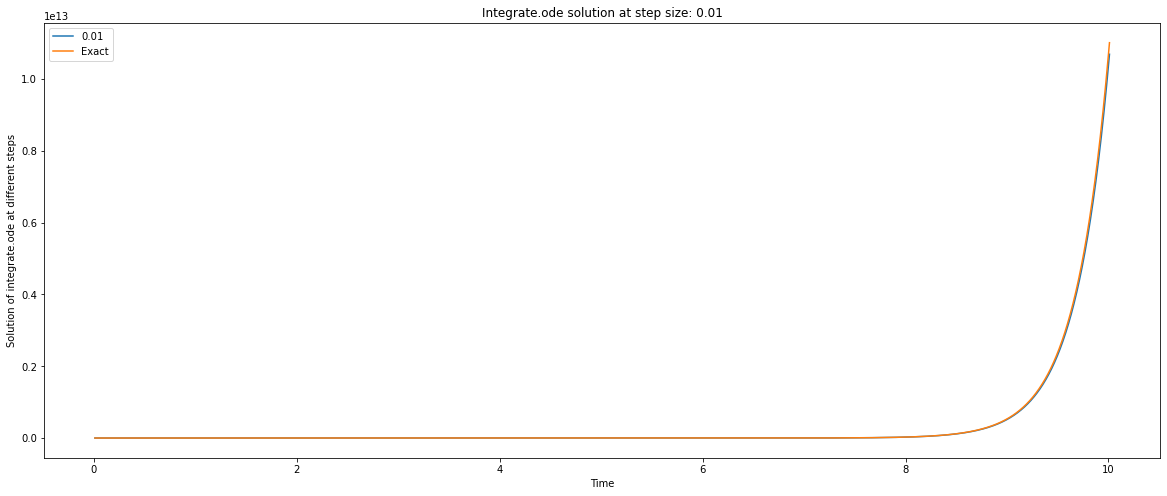

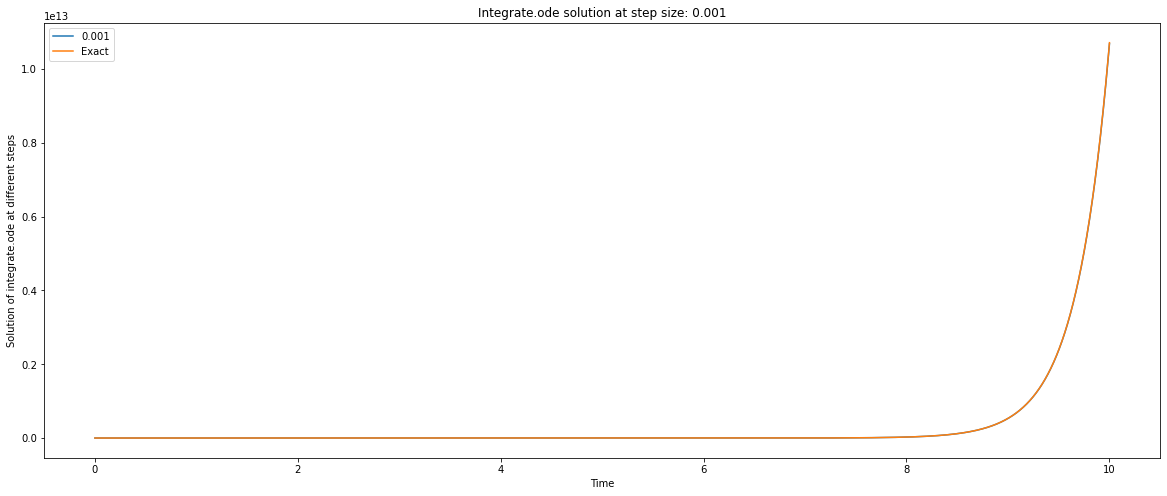

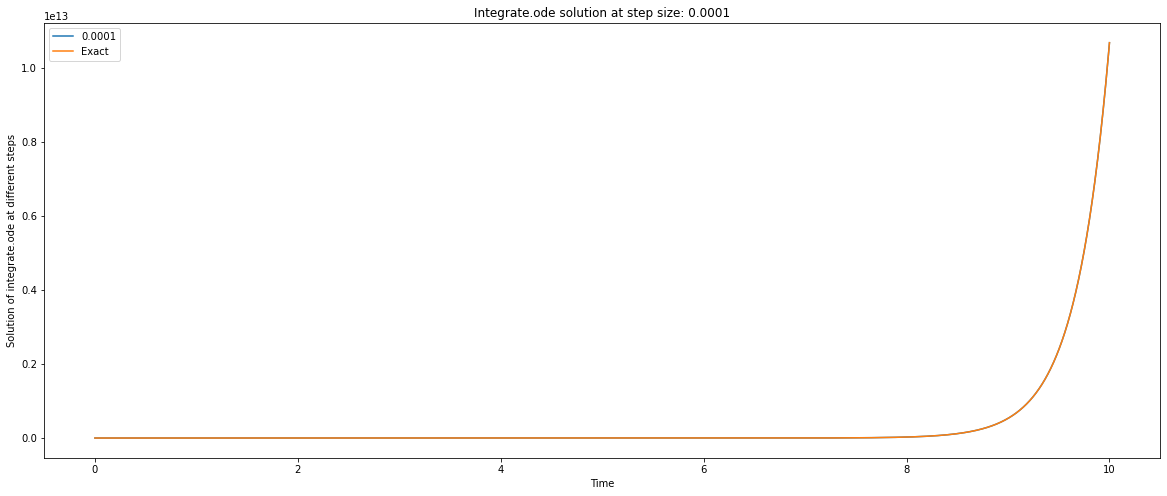

In [62]:
for i in range(len(dts)):
    p = plt.figure(i)
    p.set_figwidth(20)
    p.set_figheight(8)
    p = plt.subplot()
    p.plot(tss[i], yss[i]) 
    p.plot(tss[i], y_exacts[i]) 
    p.legend((str(dts[i]), "Exact"))
    p.set_xlabel('Time') 
    p.set_ylabel('Solution of integrate.ode at different steps') 
    p.set_title("Integrate.ode solution at step size: " + str(dts[i]))


Plot Error:

Text(0.5, 1.0, 'Error in Integrate.ode solution at different step sizes')

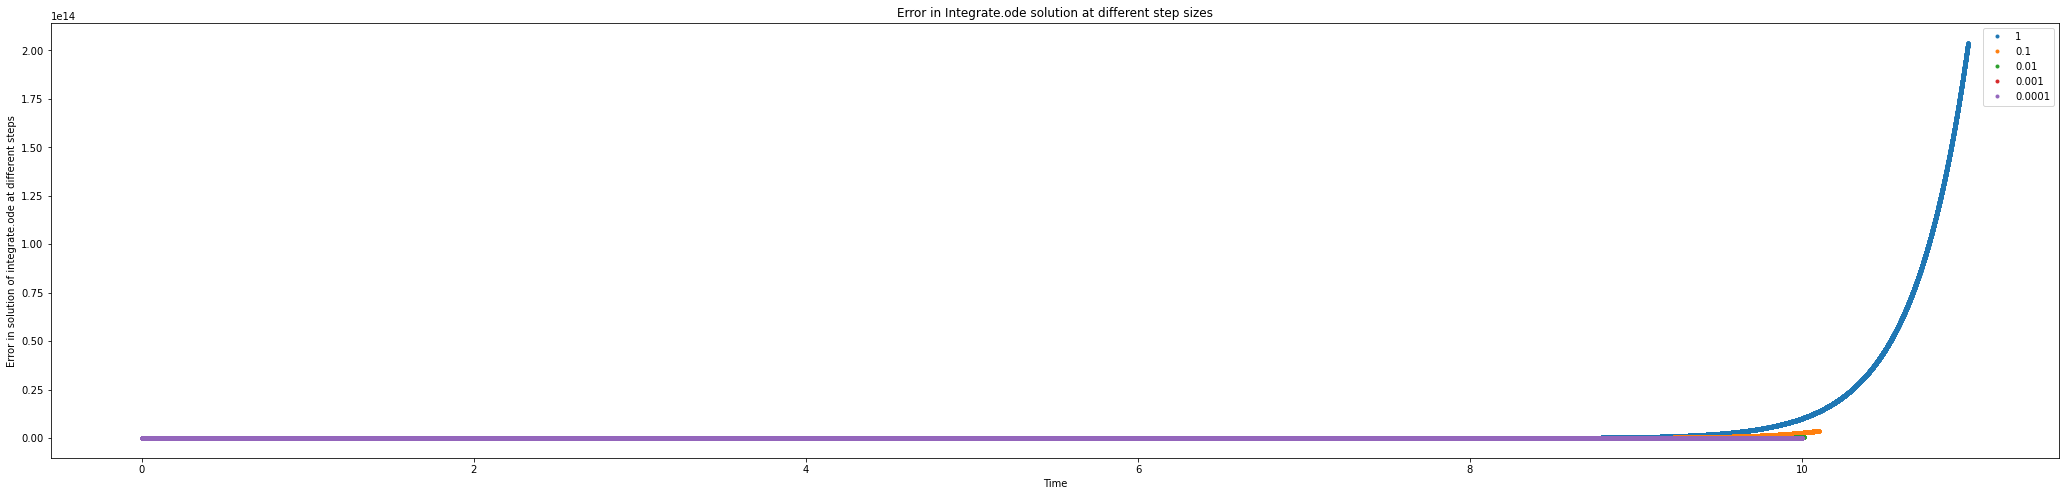

In [63]:
p = plt.figure(1)

p.set_figwidth(36)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(y_difference)):
    p.plot(tss[i], y_difference[i], ".") 
p.legend((dts))
p.set_xlabel('Time') 
p.set_ylabel('Error in solution of integrate.ode at different steps') 
p.set_title("Error in Integrate.ode solution at different step sizes")


To better understad the effect of the time step, I will plot the steps size against the area under the error curve. (numpy.trapz() function integrate along the given axis using the composite trapezoidal rule https://numpy.org/doc/stable/reference/generated/numpy.trapz.html)

Text(0.5, 1.0, 'Area under error curve against step size')

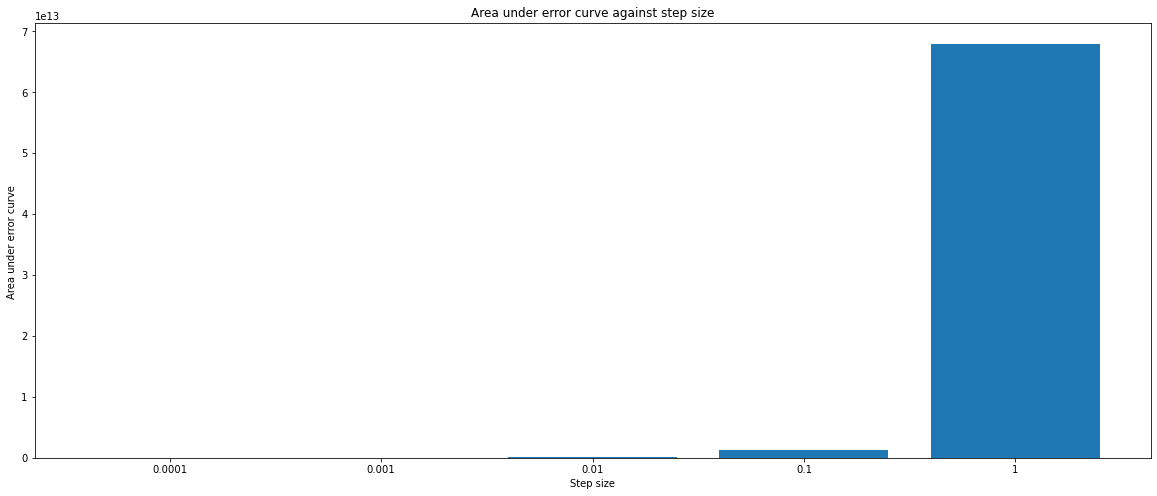

In [64]:
area_under_curve = []
for i in range(len(y_difference)):
    area_under_curve.append(np.trapz(y_difference[i], tss[i]))
p = plt.figure(1)


p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.bar(list(map(str, dts[::-1] )) , area_under_curve[::-1]) 
p.set_xlabel('Step size') 
p.set_ylabel('Area under error curve ') 
p.set_title("Area under error curve against step size")



# ATOL

Here, we set the step size to a constant value (0.1) and find the error for different values of atol.


In [82]:
# Define a function which calculates the derivative
def f(t, u):
    return [u[1], 9*u[0]]

# initial values
y0 = [1, 3]
t0 = 0

# time step 
max_time = 10
dt = 0.1

# generate 20 values of atol
atols = []
atol = 1e-10
atols.append(atol)
for i in range(19):
    atol = atol*np.sqrt(10)
    atols.append(atol)
    
# perform the integration 
yss_atols = []
tss_atols = []
for atol in atols:
    ys = []
    ts = []
    r = ode(f).set_integrator('zvode', atol = atol)
    r.set_initial_value(y0, t0)
    while r.successful() and r.t < max_time:
        ts.append(r.t + dt)
        ys.append(np.abs(r.integrate(r.t + dt)[0]))
    yss_atols.append(ys)
    tss_atols.append(ts)

tss_atols =  np.array(tss_atols)
yss_atols = np.array(yss_atols)

# define the exact solution at every time step for different time steps
y_exacts = []
for atol in atols:
    y_exact = []
    for t in tss_atols[0]:
        y_exact.append(np.exp(3*t))
    y_exacts.append(y_exact)
y_exacts = np.array(y_exacts,  dtype=object)


# find error 
y_difference = np.abs((yss_atols - y_exacts)/y_exacts)

print("done")

done


In [83]:
print(y_difference[0])

[9.648828340511564e-07 9.648899615034001e-07 9.309196272220796e-07
 8.024159478284336e-07 6.244015876625922e-07 5.682506650986114e-07
 5.459585613104908e-07 5.227829309095293e-07 5.172418223348548e-07
 5.701276302857323e-07 5.139932030530035e-07 4.593385700325461e-07
 4.5005460529657753e-07 4.895384240103836e-07 5.013133328845793e-07
 4.19911418082991e-07 3.9560651524531407e-07 4.076867732023374e-07
 4.608922966344505e-07 4.054701470106183e-07 3.443599118278097e-07
 3.397559419432736e-07 3.7223894995621417e-07 3.942828243074874e-07
 3.1219401241966167e-07 2.846651152913871e-07 2.9208476611837527e-07
 3.4411673877162363e-07 3.0059976772332636e-07 2.3402556090076954e-07
 2.2663541050162143e-07 2.5499542650784027e-07 2.8675422787391156e-07
 2.0577976681968768e-07 1.727610186952621e-07 1.770268130896773e-07
 2.2585233541760688e-07 1.9584991032680025e-07 1.2417873482748835e-07
 1.1391075037157044e-07 1.3804997294495287e-07 1.7807658329164664e-07
 9.982474720616956e-08 6.079674352485075e-08 

Plot results:

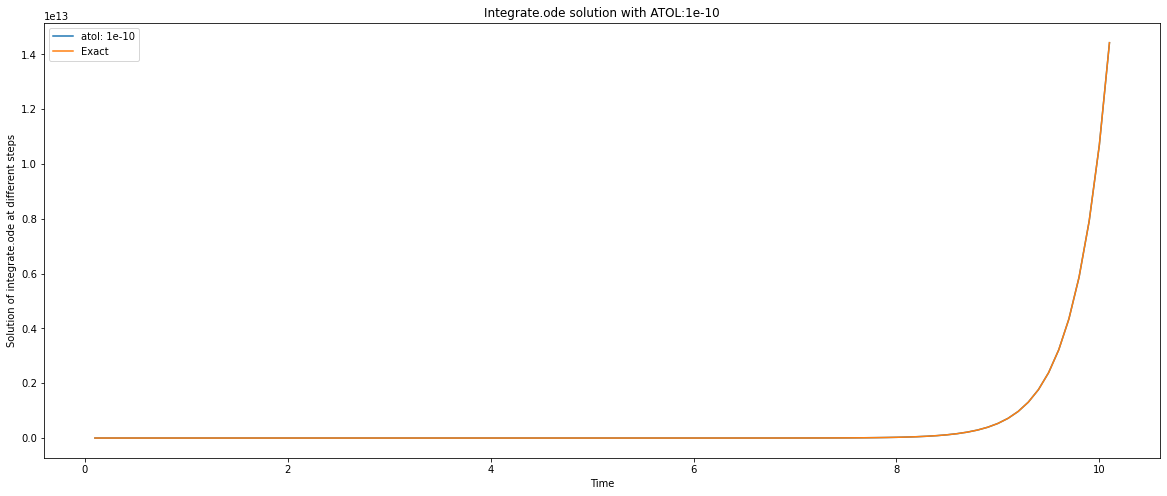

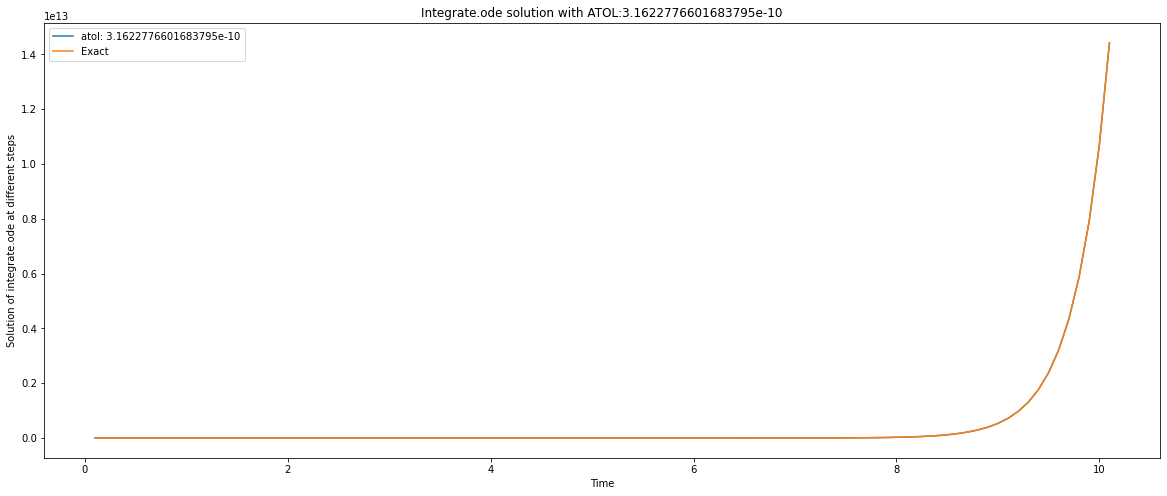

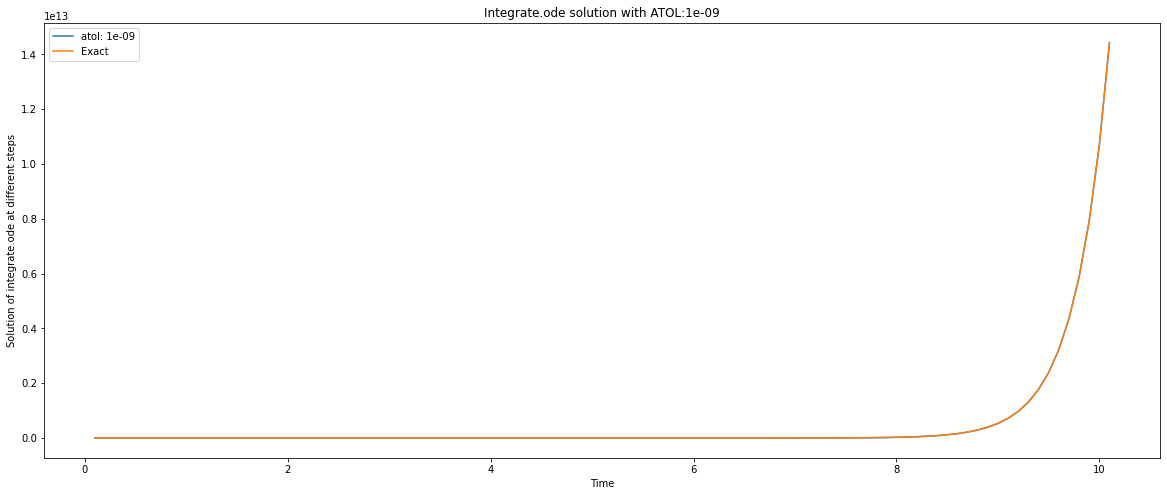

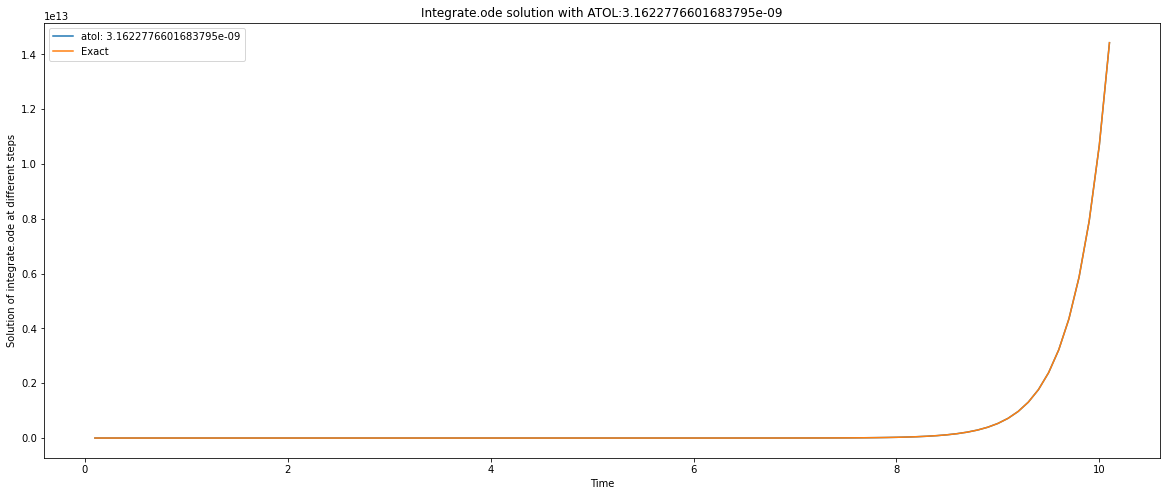

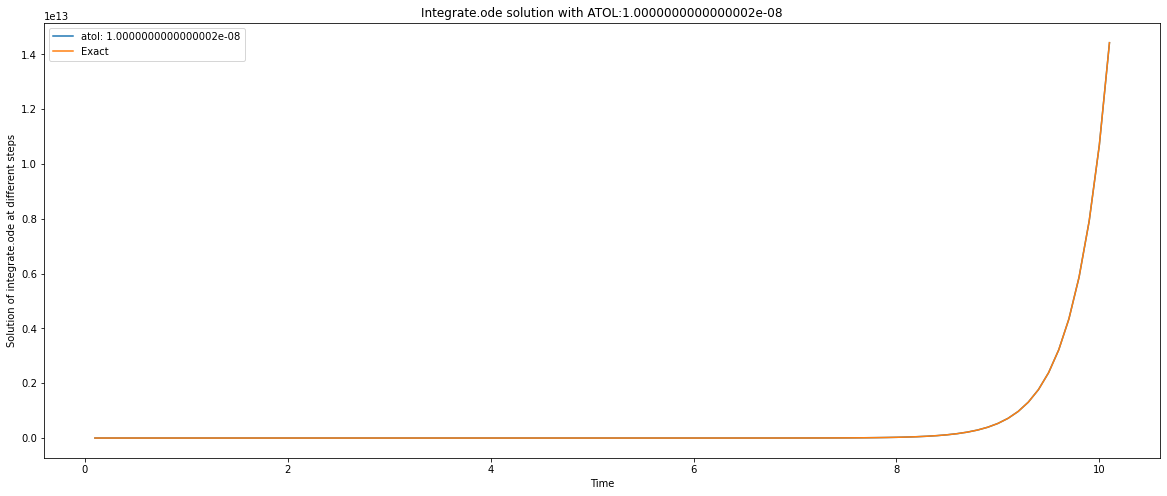

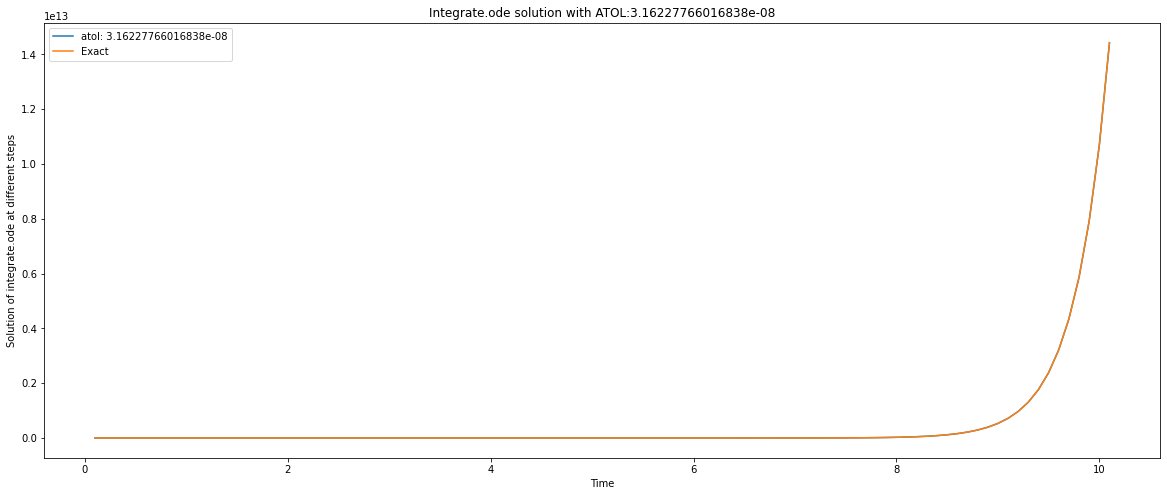

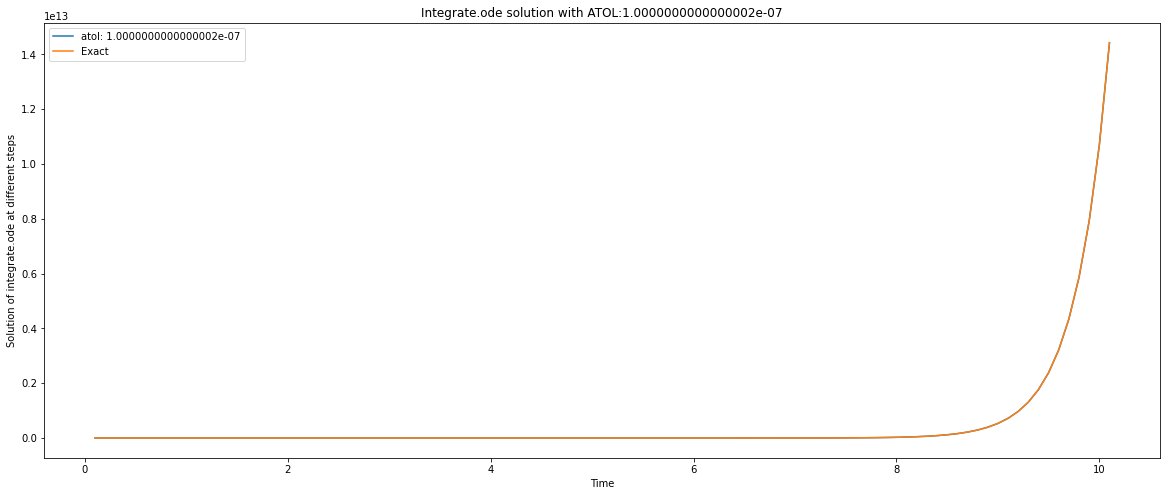

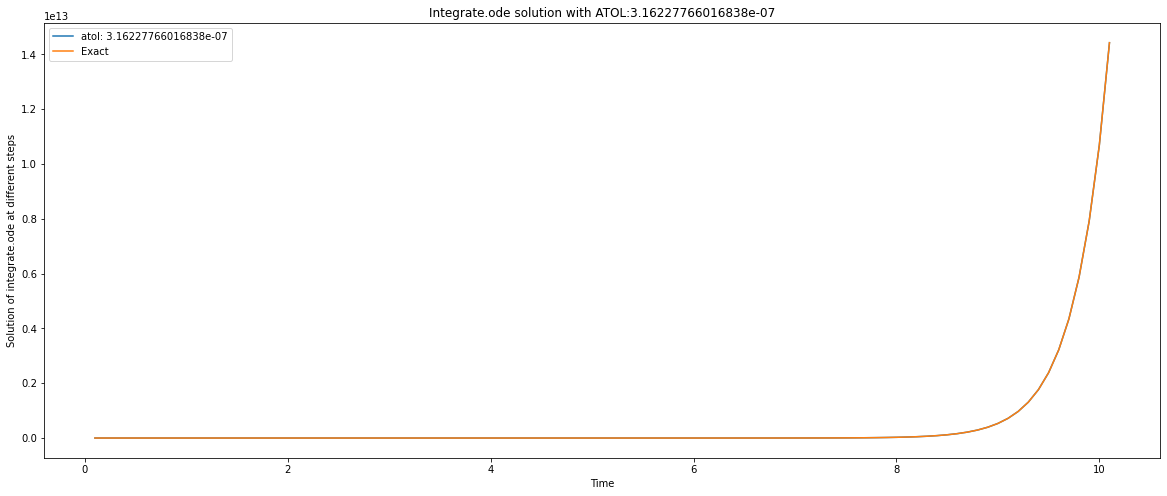

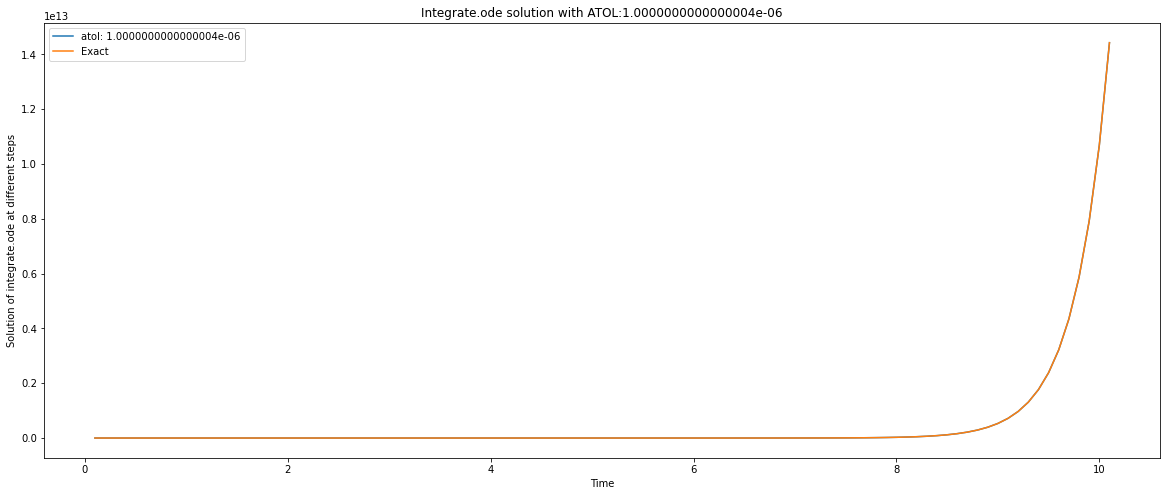

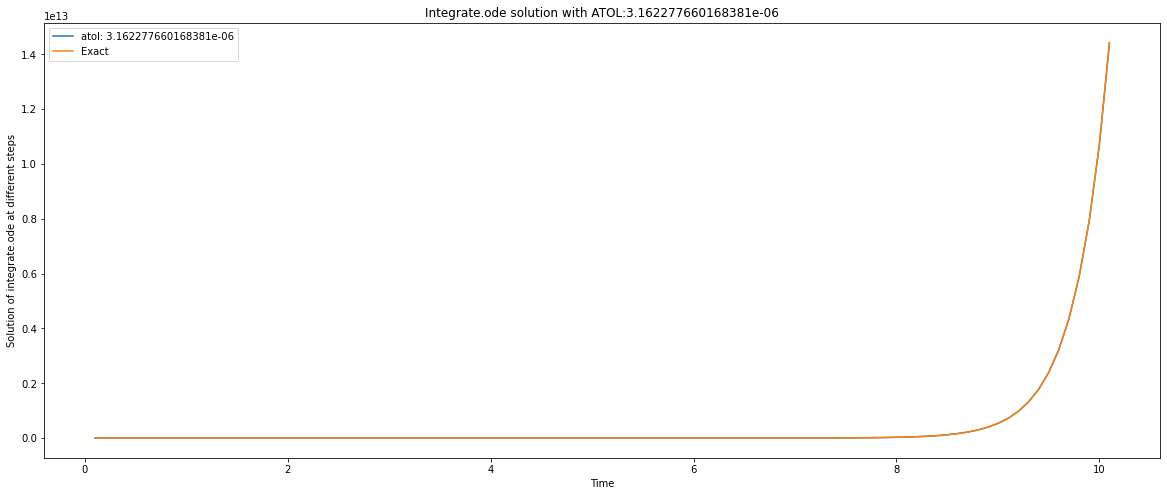

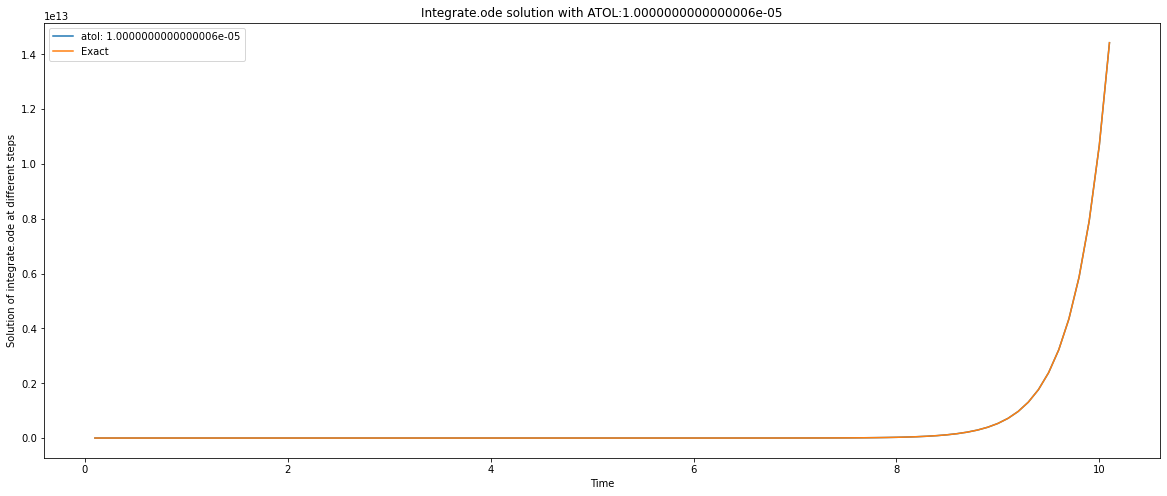

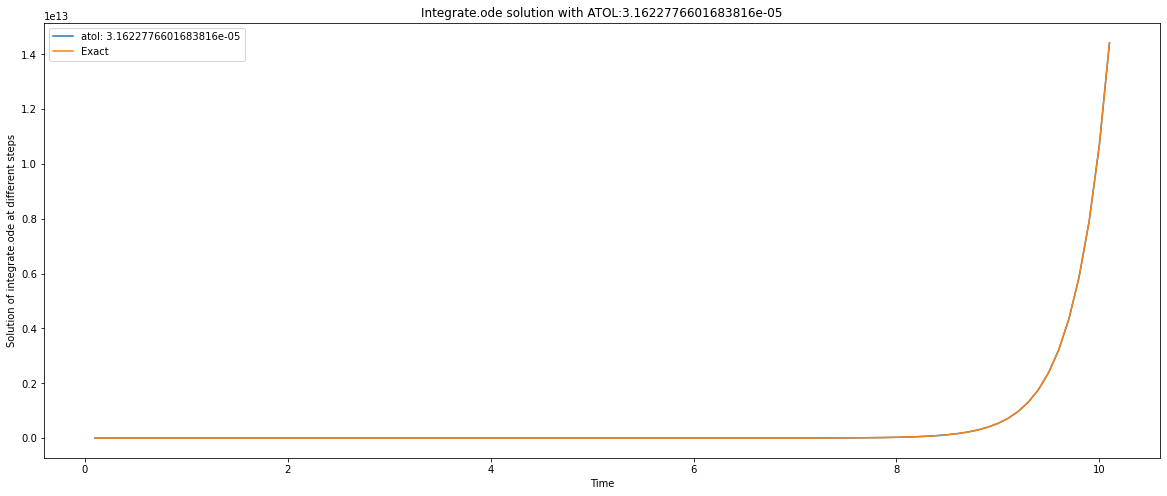

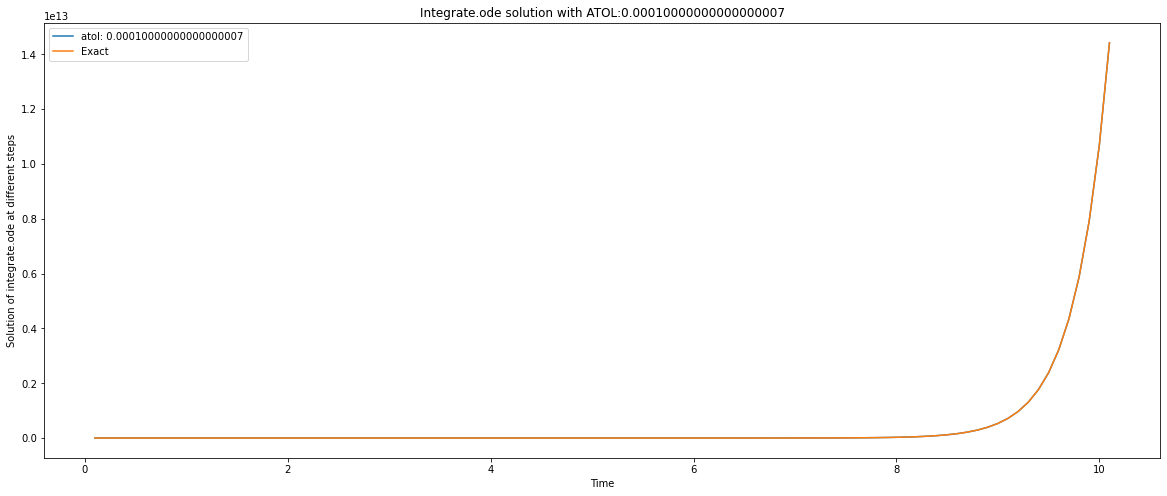

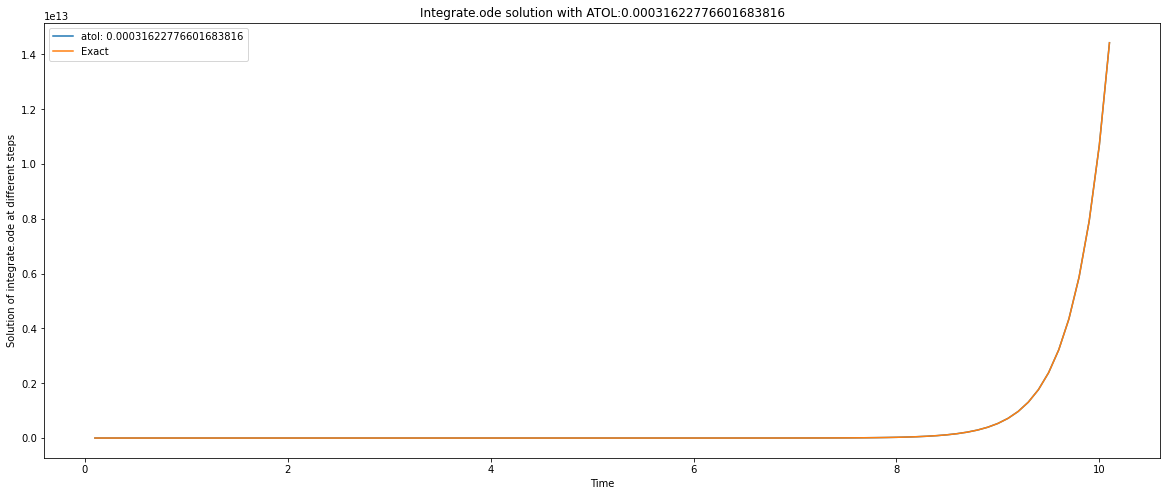

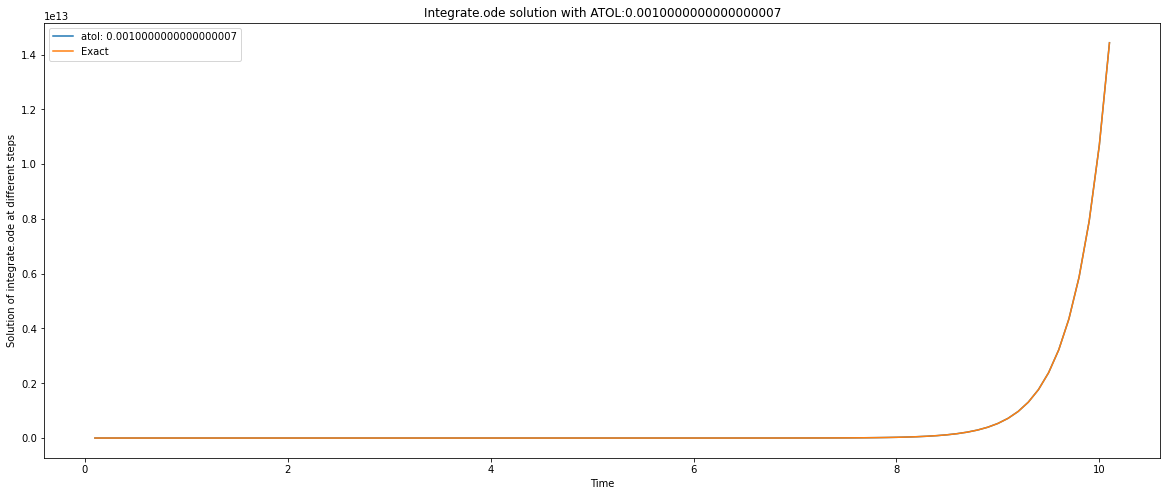

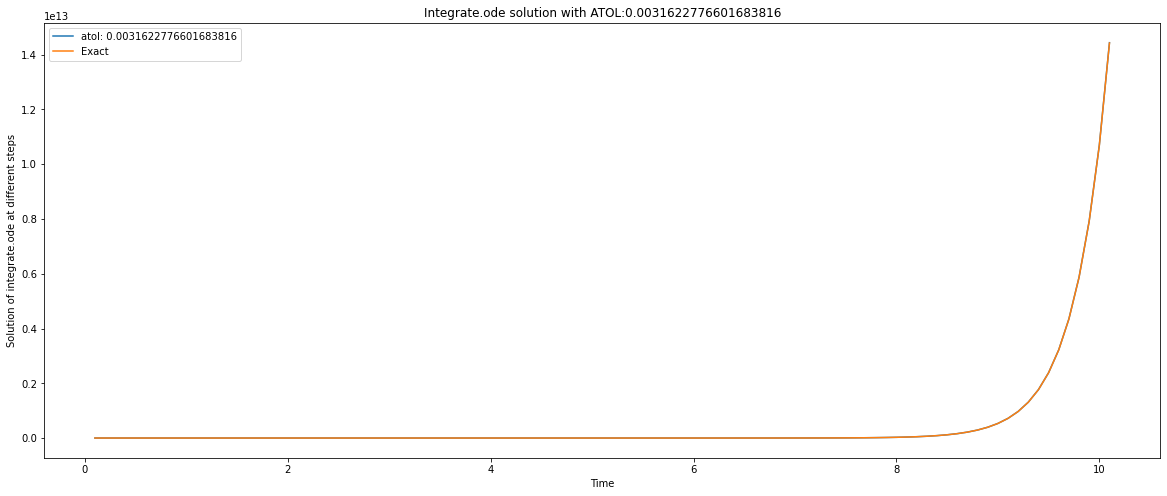

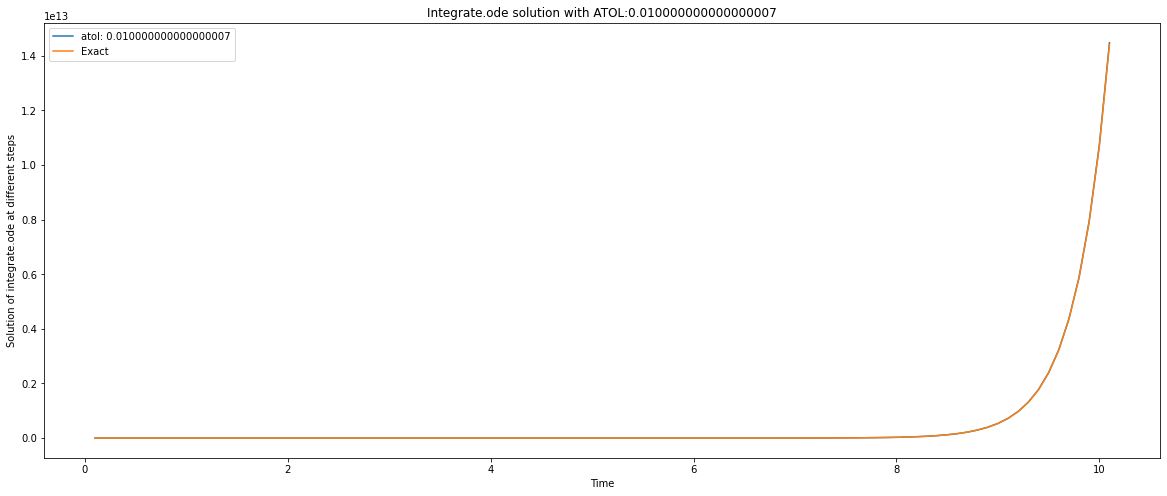

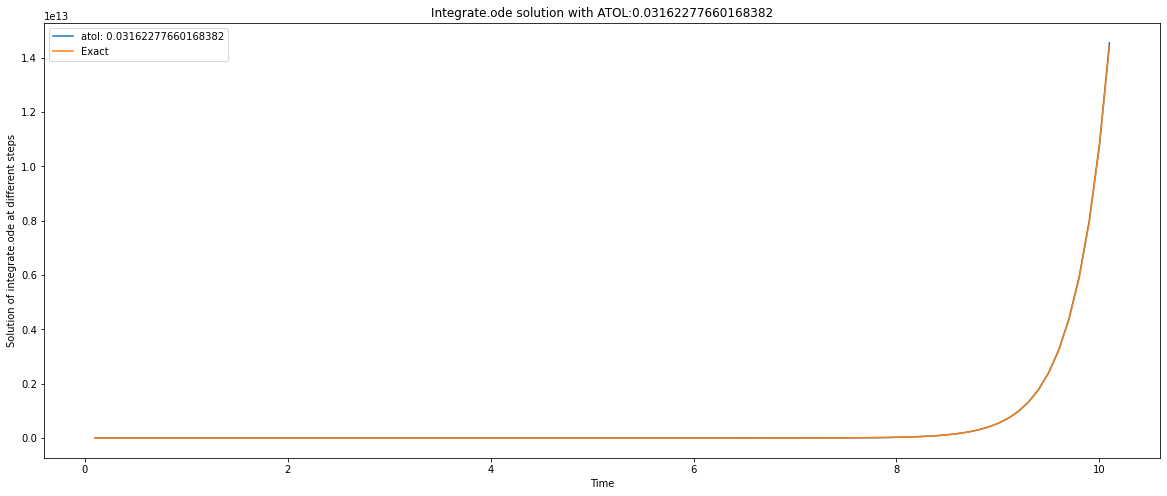

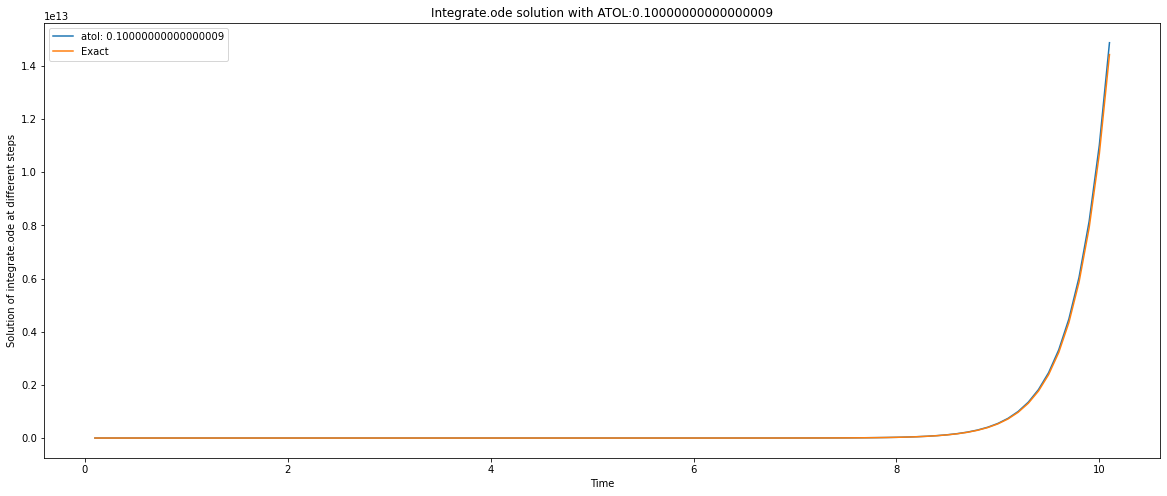

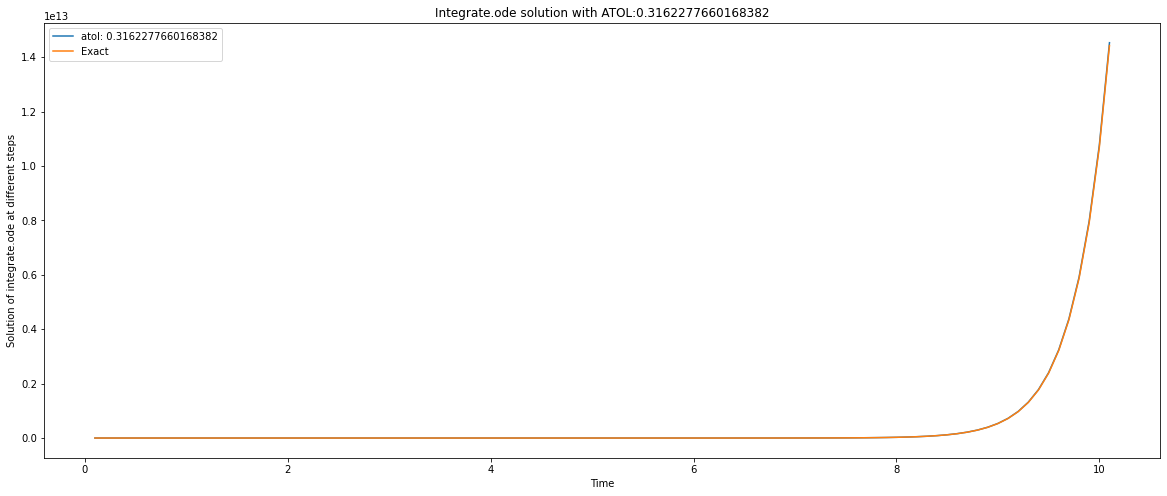

In [84]:
for i in range(len(atols)):
    p = plt.figure(i)
    p.set_figwidth(20)
    p.set_figheight(8)
    p = plt.subplot()
    p.plot(tss_atols[i], yss_atols[i]) 
    p.plot(tss_atols[i], y_exacts[i]) 
    p.legend(("atol: " + str(atols[i]), "Exact"))
    p.set_xlabel('Time') 
    p.set_ylabel('Solution of integrate.ode at different steps') 
    p.set_title("Integrate.ode solution with ATOL:" + str(atols[i]))


Plot Error:

Text(0.5, 1.0, 'Error in Integrate.ode solution at step 0.01 and different atols')

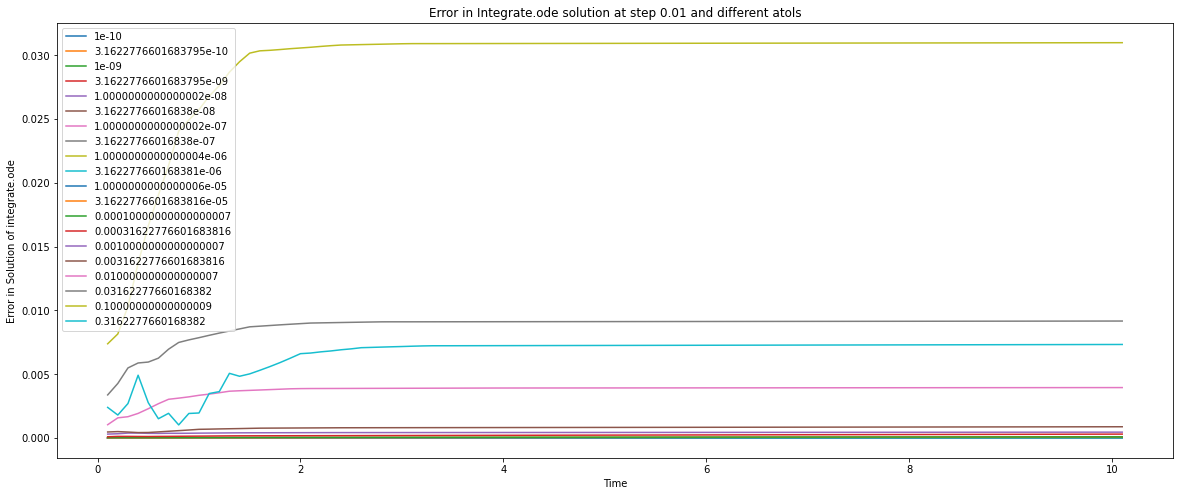

In [85]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(atols)):
    p.plot(tss_atols[i], y_difference[i]) 
p.legend((atols))

p.set_xlabel('Time') 
p.set_ylabel('Error in Solution of integrate.ode') 
p.set_title("Error in Integrate.ode solution at step 0.01 and different atols")


Text(0.5, 1.0, 'Area under error curve against atol')

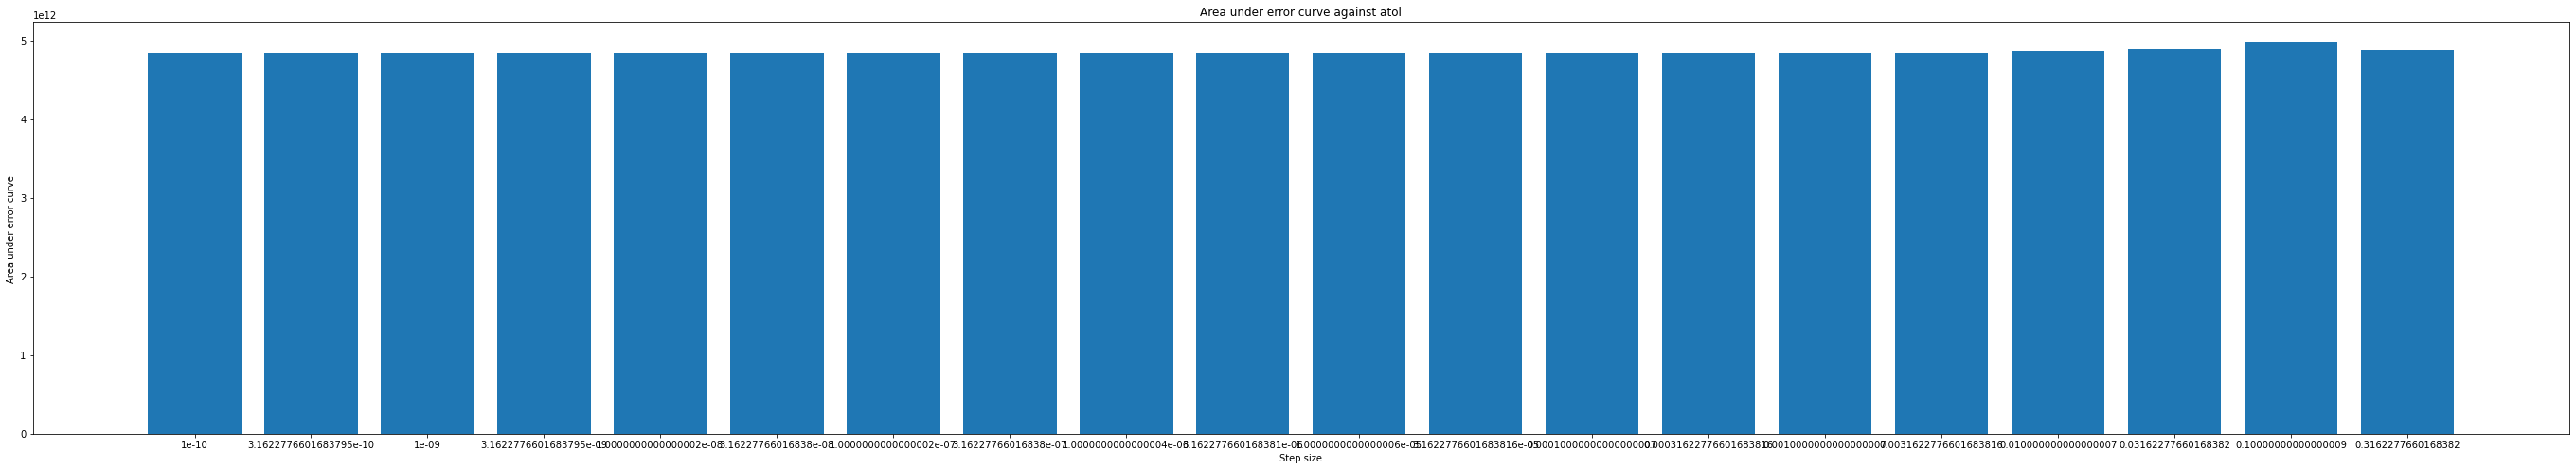

In [86]:
area_under_curve = []
for i in range(len(yss_atols)):
    area_under_curve.append(np.trapz(yss_atols[i], tss_atols[i]))
    
p = plt.figure(1)
p.set_figwidth(48)
p.set_figheight(8)
p = plt.subplot()
p.bar(list(map(str, atols )) , area_under_curve) 
p.set_xlabel('Step size') 
p.set_ylabel('Area under error curve ') 
p.set_title("Area under error curve against atol")


In [75]:
# Define a function which calculates the derivative
def f(t, u):
    return [u[1], 9*u[0]]

# initial values
y0 = [1, 3]
t0 = 0

# time step 
max_time = 10
dt = 0.1


# generate 20 values of rtol
rtols = []
rtol = 1e-10
rtols.append(rtol)
for i in range(19):
    rtol = rtol*np.sqrt(10)
    rtols.append(rtol)

# perform the integration 
yss_rtols = []
tss_rtols = []
for rtol in rtols:
    ys = []
    ts = []
    r = ode(f).set_integrator('zvode', rtol = rtol)
    r.set_initial_value(y0, t0)
    while r.successful() and r.t < max_time:
        ts.append(r.t + dt)
        ys.append(np.abs(r.integrate(r.t + dt)[0]))
    yss_rtols.append(ys)
    tss_rtols.append(ts)

tss_rtols =  np.array(tss_rtols)
yss_rtols = np.array(yss_rtols)

# define the exact solution at every time step for different time steps
y_exacts = []
for rtol in rtols:
    y_exact = []
    for t in tss_rtols[0]:
        y_exact.append(np.exp(3*t))
    y_exacts.append(y_exact)
y_exacts = np.array(y_exacts,  dtype=object)


# find error 
y_difference = np.abs(yss_rtols - np.array(y_exacts))

print("done")

done


Plot results:

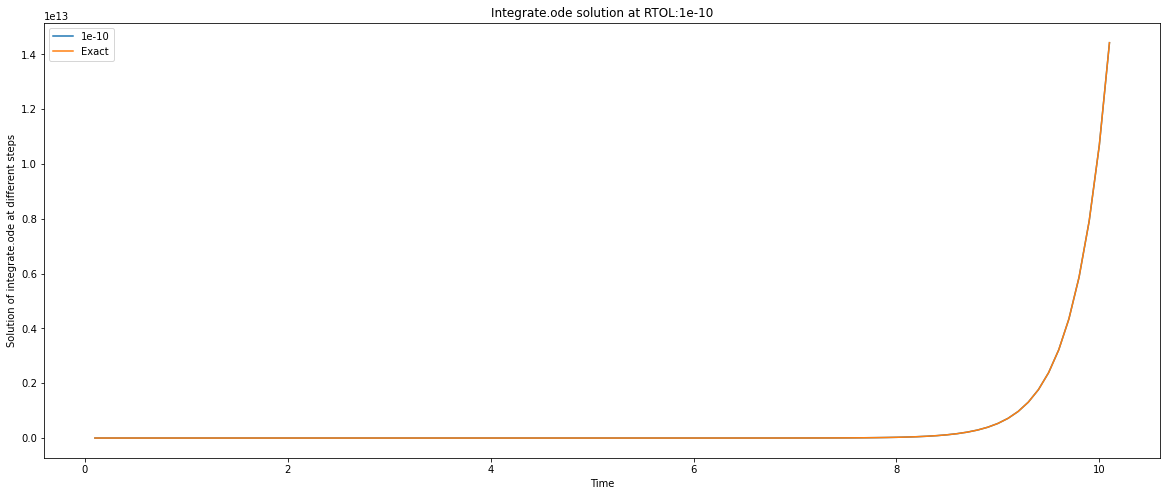

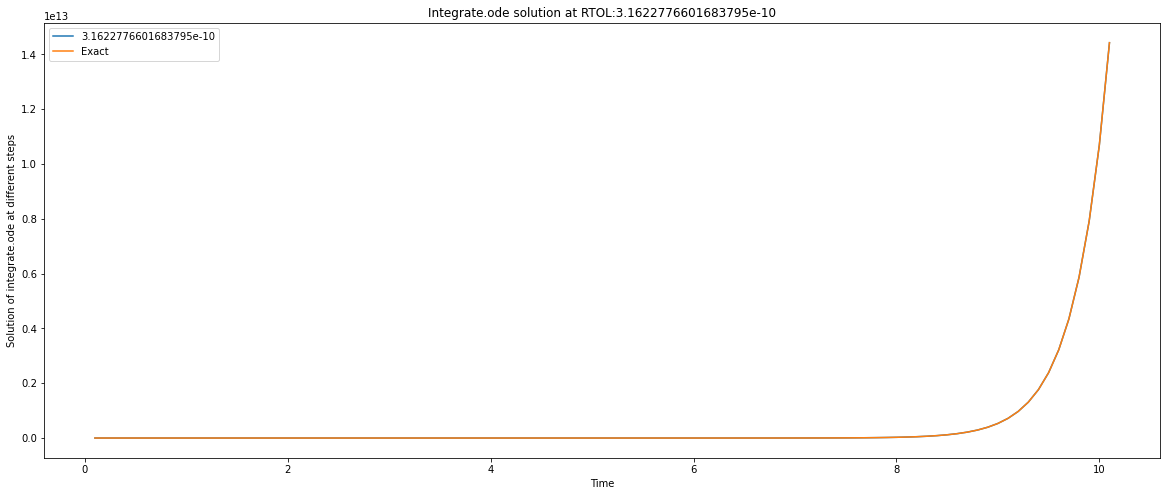

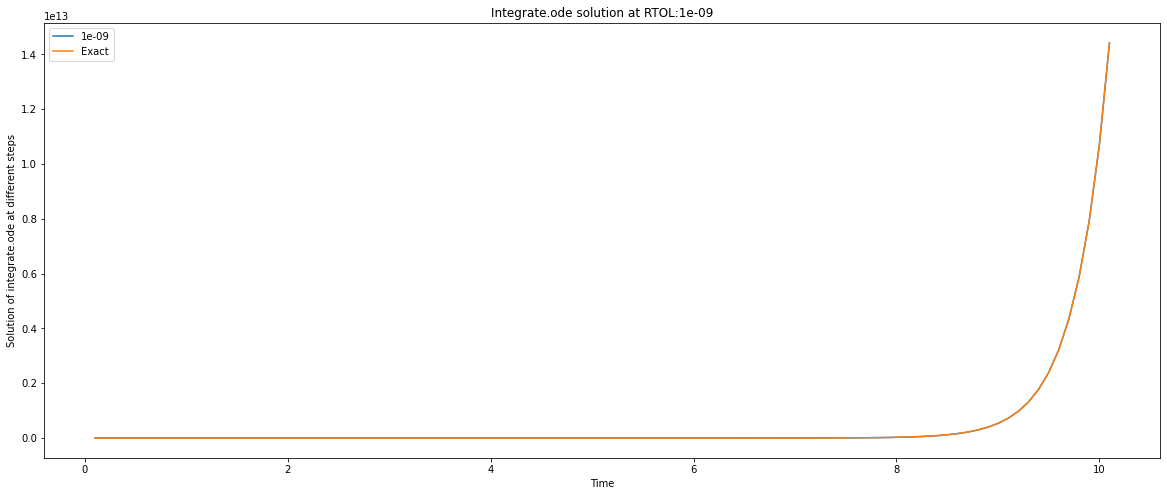

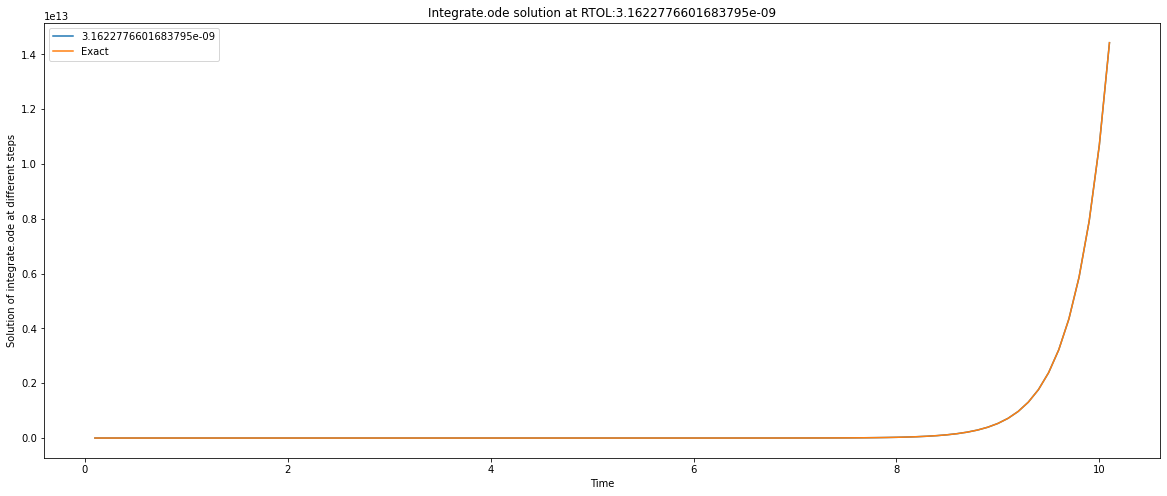

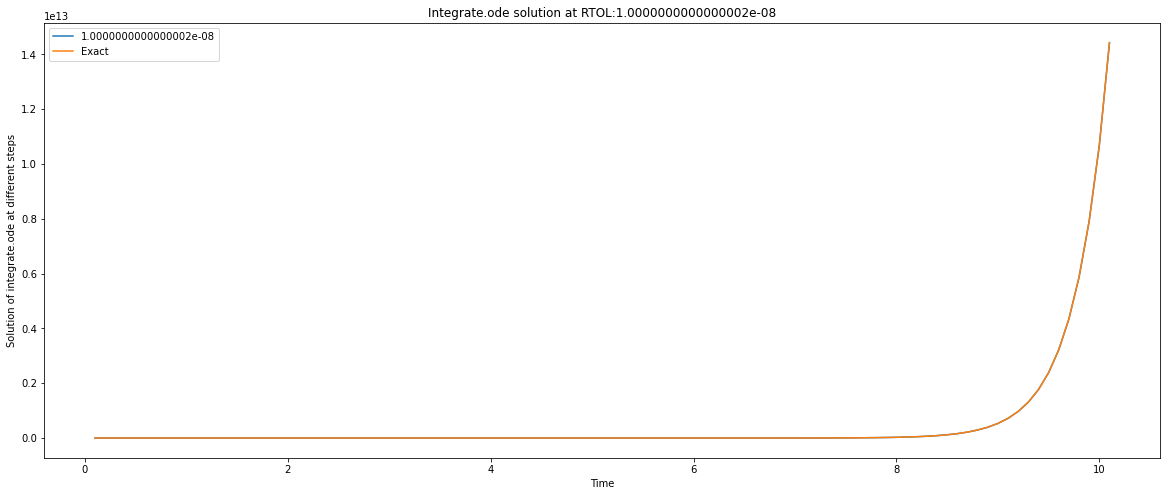

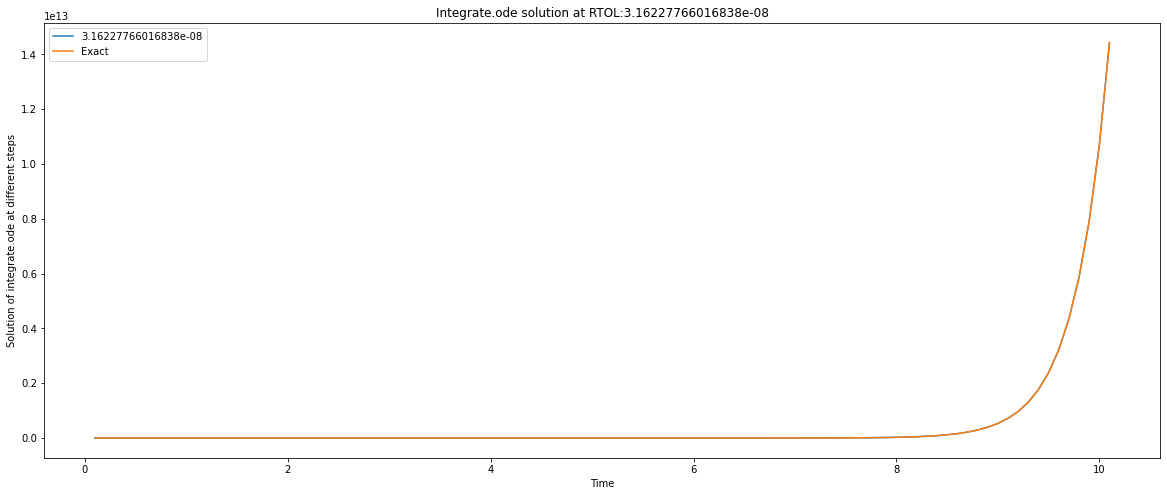

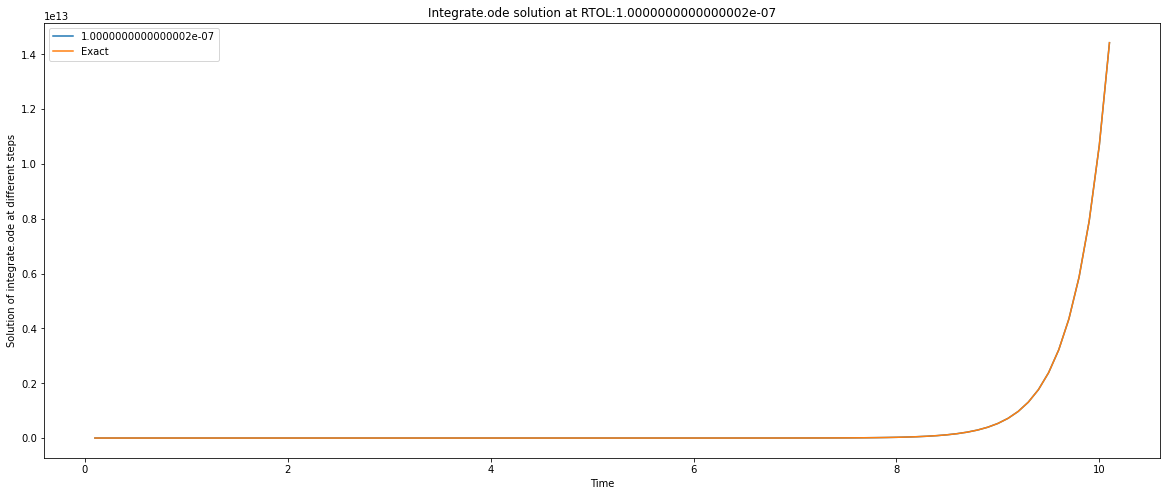

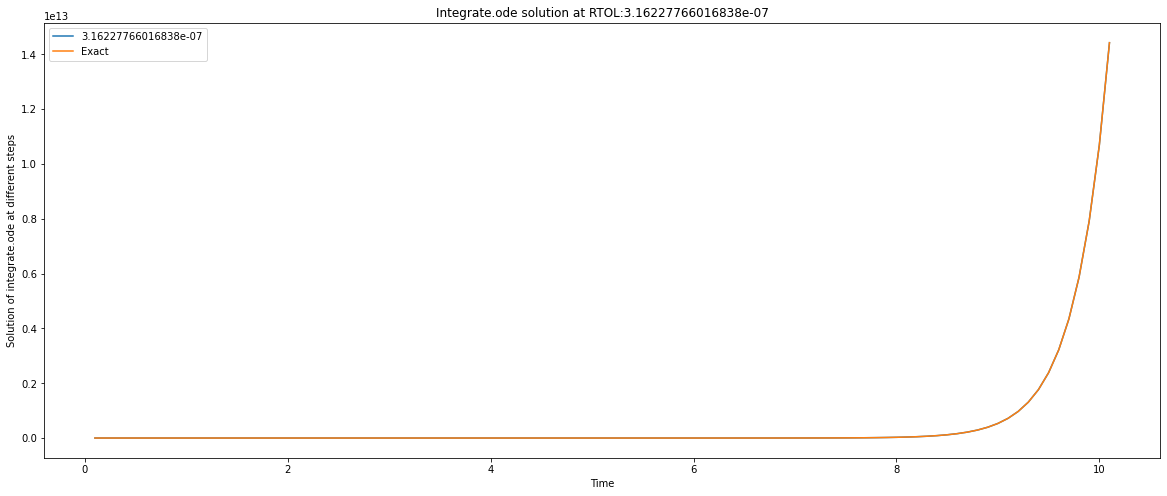

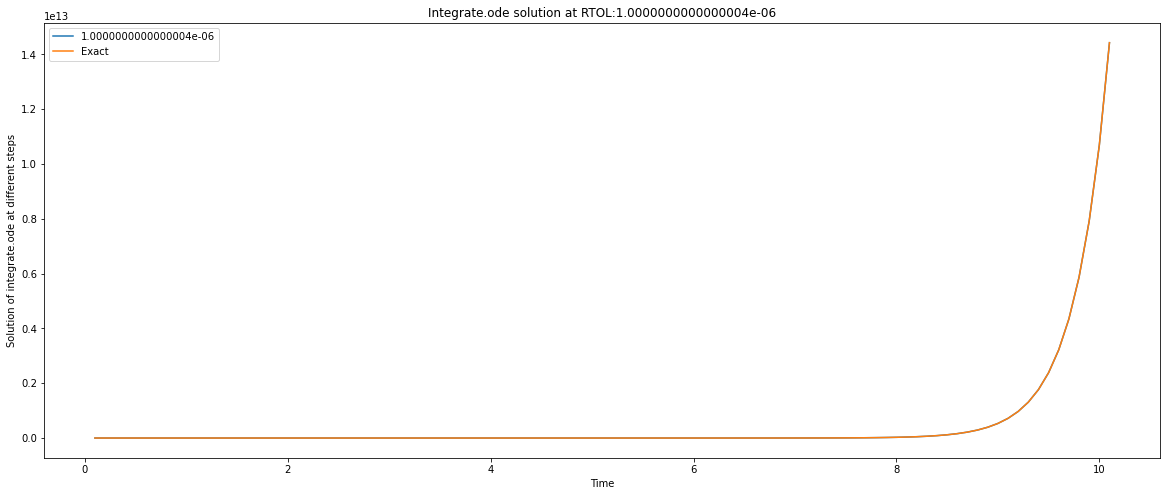

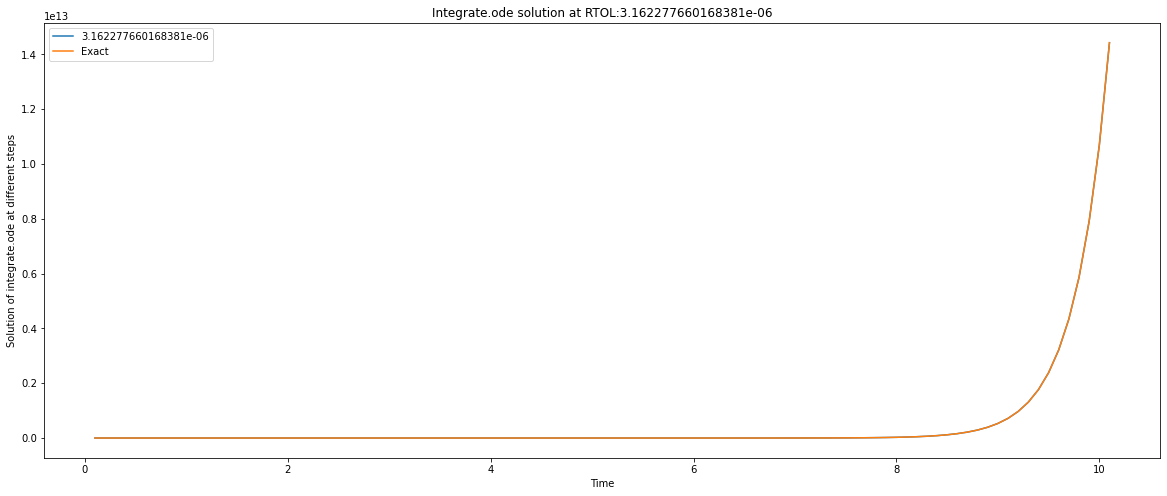

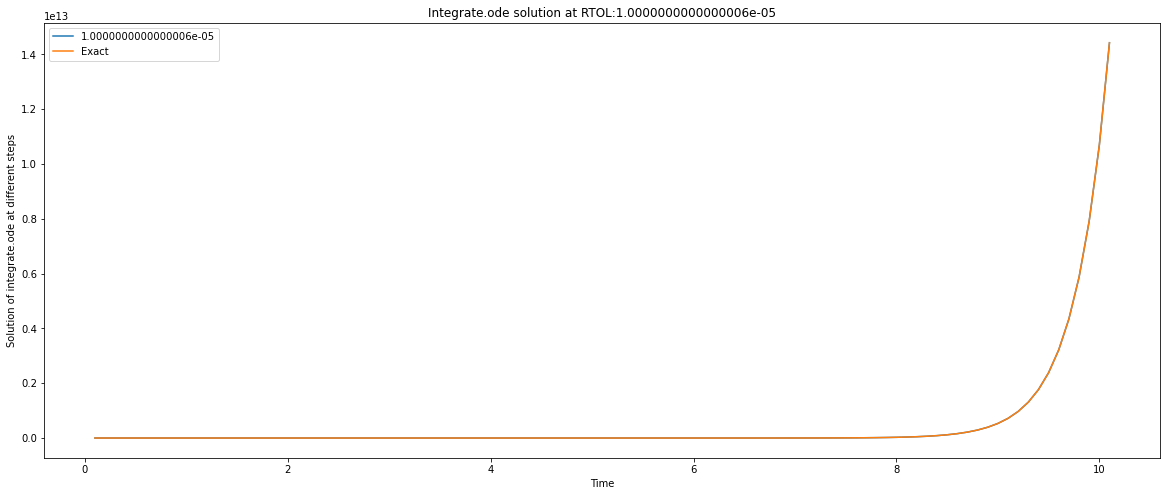

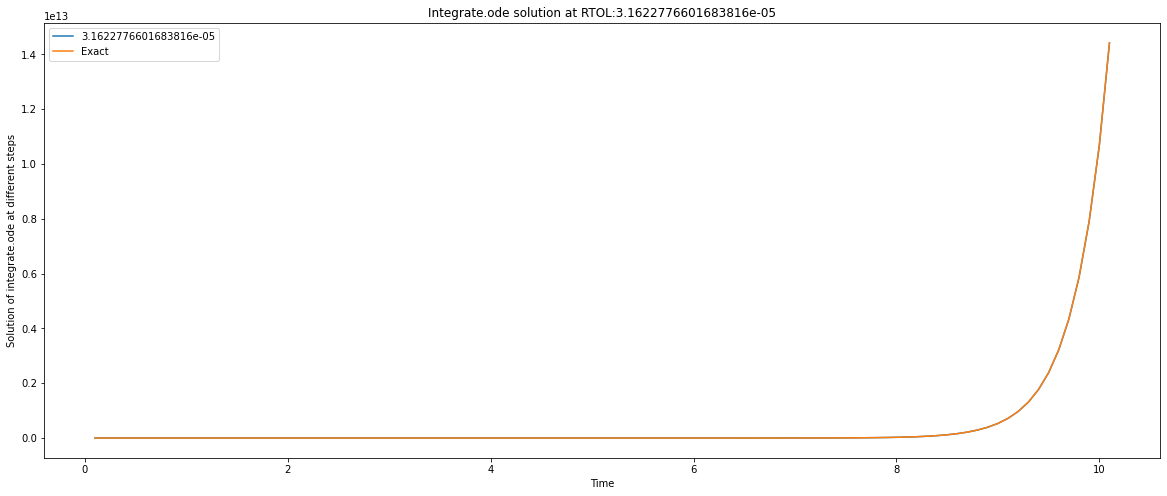

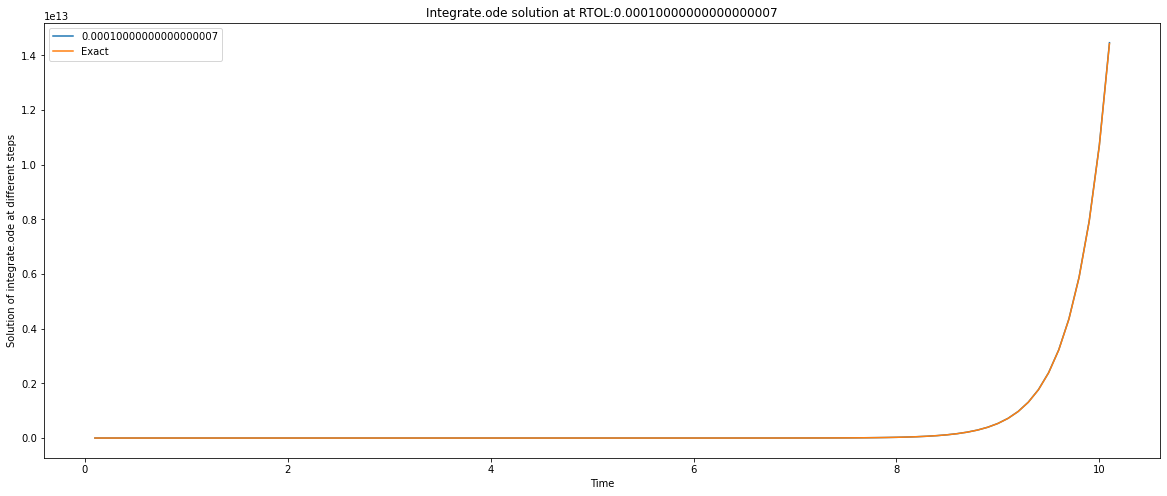

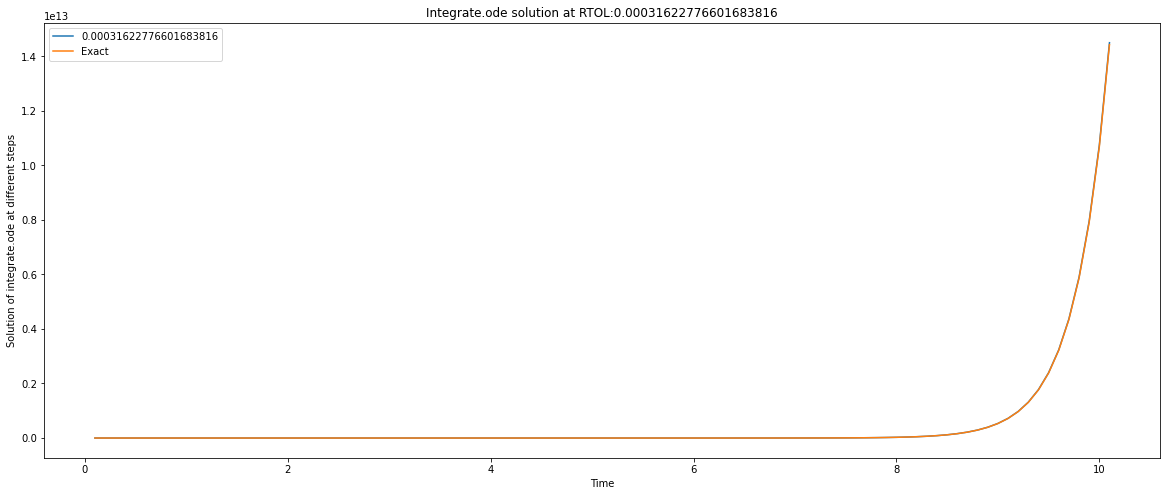

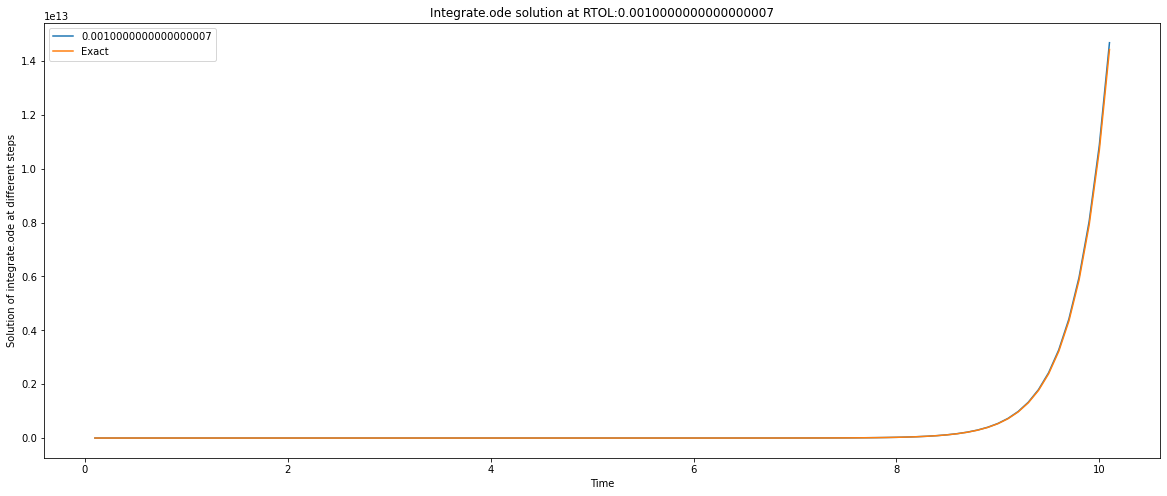

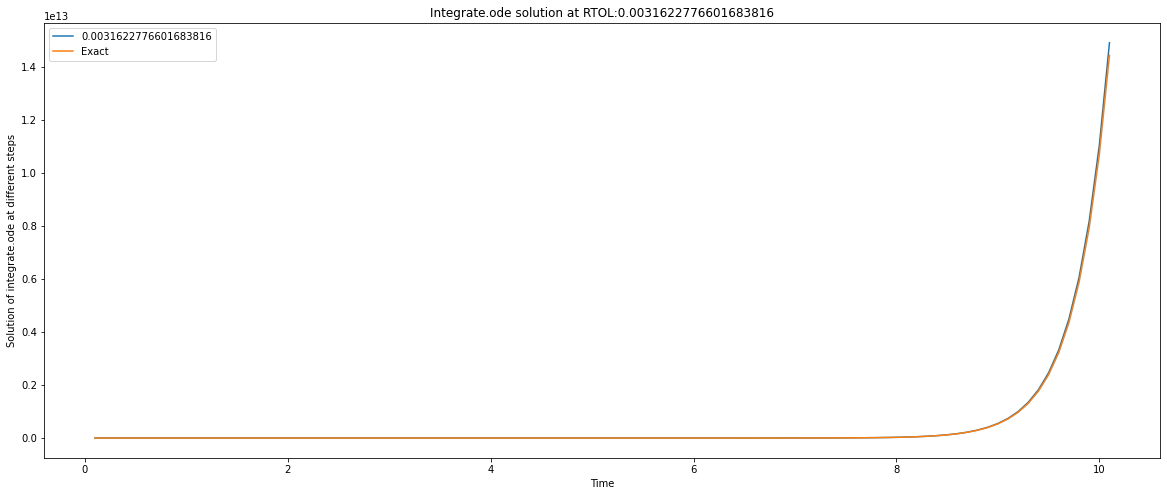

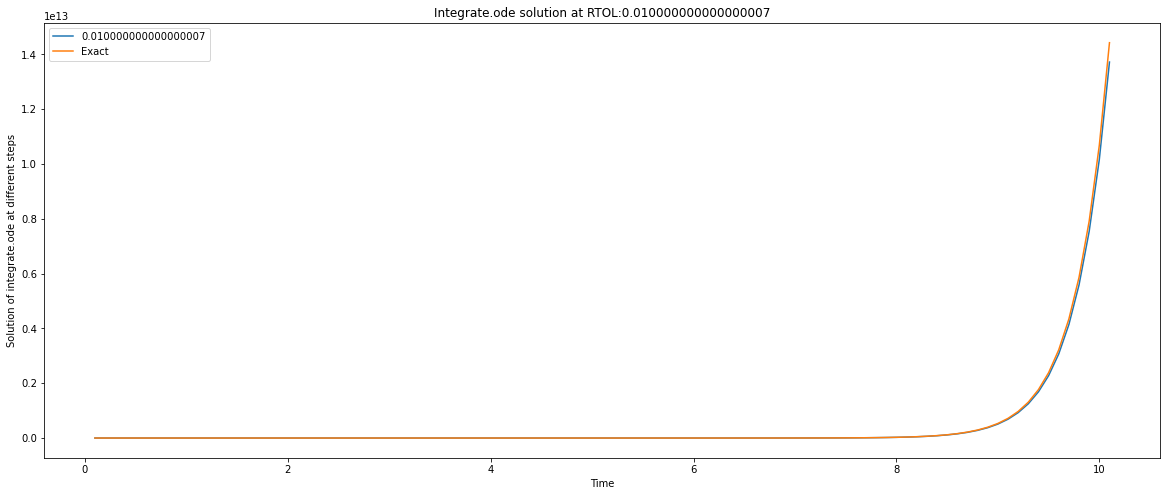

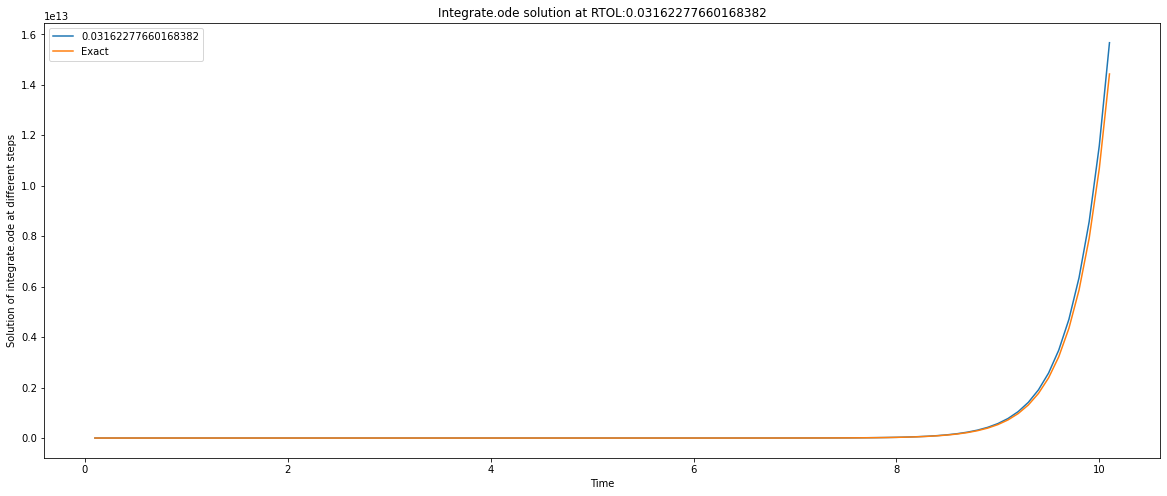

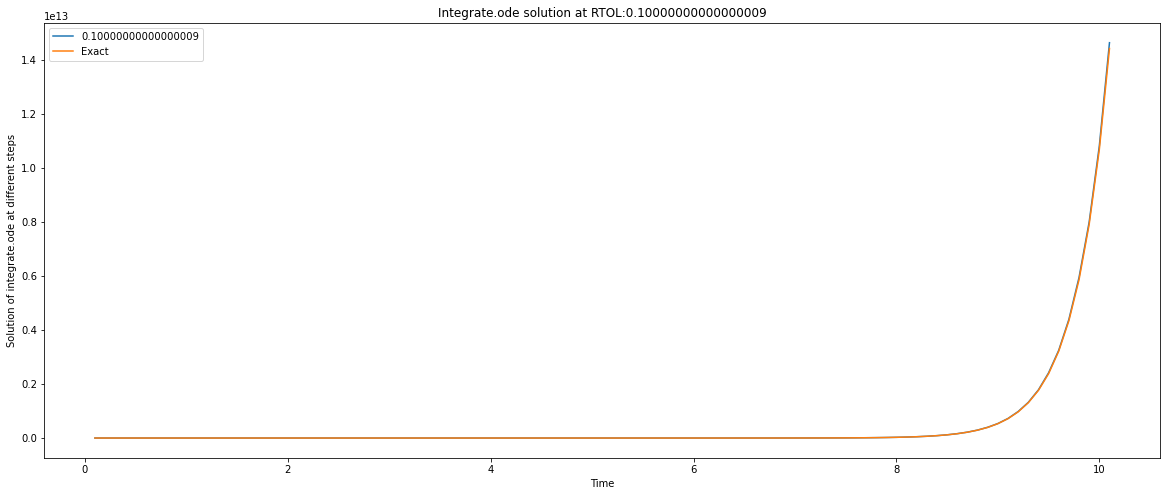

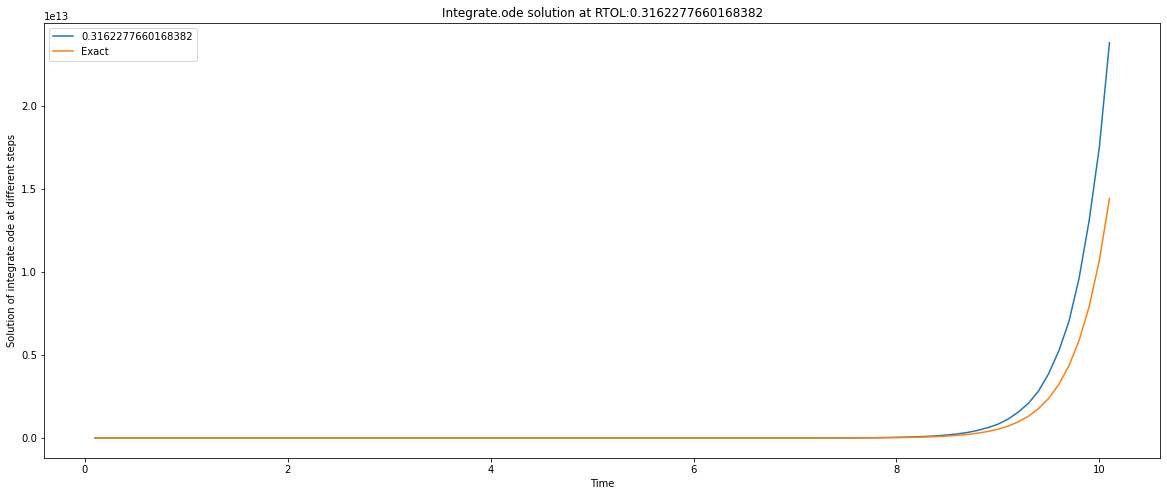

In [76]:
for i in range(len(rtols)):
    p = plt.figure(i)
    p.set_figwidth(20)
    p.set_figheight(8)
    p = plt.subplot()
    p.plot(tss_rtols[i], yss_rtols[i]) 
    p.plot(tss_rtols[i], y_exacts[i]) 
    p.legend((str(rtols[i]), "Exact"))
    p.set_xlabel('Time') 
    p.set_ylabel('Solution of integrate.ode at different steps') 
    p.set_title("Integrate.ode solution at RTOL:" + str(rtols[i]))
